## TRABALHO DE CONCLUSÃO DE CURSO
Ciência de dados e Big Data

Cleyton Pereira Murça


In [ ]:
#instale o Pycaret, ao final talvez seja necessário reiniciar o ambiente
!pip install pycaret

     |████████████████████████████████| 266kB 12.0MB/s 
     |████████████████████████████████| 112kB 26.4MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 2.0MB 26.1MB/s 
     |████████████████████████████████| 1.4MB 42.9MB/s 
     |████████████████████████████████| 256kB 56.2MB/s 
     |████████████████████████████████| 6.8MB 42.5MB/s 
     |████████████████████████████████| 1.7MB 49.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 14.2MB 216kB/s 
     |████████████████████████████████| 276kB 64.3MB/s 
     |████████████████████████████████| 174kB 68.4MB/s 
     |████████████████████████████████| 3.1MB 53.1MB/s 
     |████████████████████████████████| 112kB 76.4MB/s 
     |████████████████████████████████| 10.1MB 29.4

Atenção: após a instalação acima, algumas vezes foi necessário reiniciar o ambiente.

In [ ]:
import numpy as np                                    # Numpy
import pandas as pd                                   # Pandas
from sklearn.model_selection import train_test_split  # Scikit separar treino/teste
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import pycaret                                        # Pycaret
from pycaret.regression import *                      # Pycaret para Regressão
from pycaret.utils import enable_colab                # Para executar gráficos no Colab

dados = pd.read_excel("BaseAtendimento0406.xlsx", sheet_name=0) 

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31340 entries, 0 to 31339
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada       23510 non-null  datetime64[ns]
 1   hora_agendada       23510 non-null  object        
 2   qtd_senha_agendada  23510 non-null  float64       
 3   dia_atendimento     31340 non-null  datetime64[ns]
 4   qtd_senha_atendida  31340 non-null  int64         
 5   atendente           31340 non-null  int64         
 6   senha               31340 non-null  object        
 7   Início              31340 non-null  object        
 8   Fim                 31340 non-null  object        
 9   estado              31340 non-null  object        
 10  Serviço             31340 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 2.6+ MB


In [ ]:
# ordenar os dados em ordem cronologica
dados.sort_values(by=['dia_atendimento',"Início",'senha'],inplace=True)
#resetar o index
dados.reset_index(drop=True, inplace=True)

In [ ]:
dados.head(100)

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,estado,Serviço
0,2019-01-07 12:00:00,12:00:00,58.0,2019-01-07,87,4,PEC1,12:01:00,12:07:00,Conclusivo,Certidões e Situação Fiscal - Certidão de Regu...
1,NaT,NaN,NaN,2019-01-07,87,7,BCP1,12:03:00,12:08:00,Conclusivo,Cadastro - CPF Conclusão do Serviço Iniciado n...
2,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,0,CNF1,12:10:00,12:13:00,Conclusivo,Cadastro - CNPJ Inscrição
3,2019-01-07 12:05:00,12:05:00,58.0,2019-01-07,87,7,PRF1,12:10:00,12:11:00,Conclusivo,"Processo, Senhas e Procuração - Procuração RFB..."
4,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,4,COF1,12:11:00,12:11:00,Não compareceu,Certidões e Situação Fiscal - Certidão de Aver...
5,NaT,NaN,NaN,2019-01-07,87,7,BCP2,12:12:00,12:24:00,Conclusivo,Cadastro - CPF Conclusão do Serviço Iniciado n...
6,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,4,MFF1,12:13:00,12:13:00,Não compareceu,Cobrança e Fiscalização - IRPF - Intimação/SRL...
7,2019-01-07 12:20:00,12:20:00,58.0,2019-01-07,87,4,CCF1,12:20:00,12:28:00,Conclusivo,Certidões e Situação Fiscal - Certidão de Regu...
8,NaT,NaN,NaN,2019-01-07,87,7,BCP3,12:25:00,12:31:00,Conclusivo,Cadastro - CPF Conclusão do Serviço Iniciado n...
9,2019-01-07 12:20:00,12:20:00,58.0,2019-01-07,87,0,PRJ1,12:25:00,12:25:00,Conclusivo,"Processo, Senhas e Procuração - Procuração RFB..."


# Duplicados



In [ ]:
dados[ dados.duplicated(subset=['senha', 'dia_atendimento', 'atendente'])]

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,estado,Serviço
27,2019-01-07 13:10:00,13:10:00,58.0,2019-01-07,87,8,PEO1,13:13:00,13:13:00,Não compareceu,Certidões e Situação Fiscal - Certidão de Aver...
145,2019-01-08 14:40:00,14:40:00,59.0,2019-01-08,90,4,PEC4,14:51:00,15:06:00,Conclusivo,Certidões e Situação Fiscal - Certidão de Regu...
228,2019-01-09 14:00:00,14:00:00,65.0,2019-01-09,102,3,MFF4,14:10:00,14:10:00,Não compareceu,Cobrança e Fiscalização - IRPF Impugnação
353,NaT,NaN,NaN,2019-01-10,105,8,BPQ14,15:52:00,15:55:00,Conclusivo,Declarações e Demonstrativos - Declaração IRPF...
396,NaT,NaN,NaN,2019-01-11,102,8,BPQ4,09:37:00,09:43:00,Conclusivo,Certidões e Situação Fiscal - Consulta Pendências
...,...,...,...,...,...,...,...,...,...,...,...
31241,2020-03-19 14:20:00,14:20:00,70.0,2020-03-19,77,4,PRJ7,16:11:00,16:12:00,Conclusivo,"Processo, Senhas e Procuração - Procuração RFB..."
31256,2020-03-19 16:50:00,16:50:00,70.0,2020-03-19,77,2,CPF10,17:03:00,17:03:00,Conclusivo,Cadastro - CPF Comprovante de Inscrição e Cons...
31270,2020-03-20 13:40:00,13:40:00,74.0,2020-03-20,82,4,PFF1,13:41:00,13:41:00,Não compareceu,Declarações e Demonstrativos - Declaração DITR...
31317,2020-03-20 15:50:00,15:50:00,74.0,2020-03-20,82,4,PFF3,16:03:00,16:03:00,Conclusivo,Certidões e Situação Fiscal - Consulta Pendências


In [ ]:
#Exemplo de duplicado
dados[ (dados.senha == 'PFF3') & (dados.dia_atendimento == '2020-03-20')]

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,estado,Serviço
31315,2020-03-20 15:50:00,15:50:00,74.0,2020-03-20,82,4,PFF3,15:57:00,16:03:00,Conclusivo,Certidões e Situação Fiscal - Consulta Pendênc...
31317,2020-03-20 15:50:00,15:50:00,74.0,2020-03-20,82,4,PFF3,16:03:00,16:03:00,Conclusivo,Certidões e Situação Fiscal - Consulta Pendências


Uma senha pode conter mais de um serviço e nisso o sistema a registra 2 vezes com o mesmo código da senha e hora_agendada. Mas os serviços são  atendidos em sequencia. Decidi não remover, mas tratar o tempo de espera para esses casos.

# Campos Vazios

In [ ]:
#Preenchendo a coluna quantidade de senhas agendadas para as senhas que não tiveram agendamento previamente
df = dados.groupby('dia_atendimento')['qtd_senha_agendada'].first()
for i,row in dados.loc[:].iterrows():
  ind = row['dia_atendimento']
  aux = df[ind]
  dados.loc[i,"qtd_senha_agendada"] = aux

In [ ]:
dados.head(100)

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,estado,Serviço
0,2019-01-07 12:00:00,12:00:00,58.0,2019-01-07,87,4,PEC1,12:01:00,12:07:00,Conclusivo,Certidões e Situação Fiscal - Certidão de Regu...
1,NaT,NaN,58.0,2019-01-07,87,7,BCP1,12:03:00,12:08:00,Conclusivo,Cadastro - CPF Conclusão do Serviço Iniciado n...
2,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,0,CNF1,12:10:00,12:13:00,Conclusivo,Cadastro - CNPJ Inscrição
3,2019-01-07 12:05:00,12:05:00,58.0,2019-01-07,87,7,PRF1,12:10:00,12:11:00,Conclusivo,"Processo, Senhas e Procuração - Procuração RFB..."
4,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,4,COF1,12:11:00,12:11:00,Não compareceu,Certidões e Situação Fiscal - Certidão de Aver...
5,NaT,NaN,58.0,2019-01-07,87,7,BCP2,12:12:00,12:24:00,Conclusivo,Cadastro - CPF Conclusão do Serviço Iniciado n...
6,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,4,MFF1,12:13:00,12:13:00,Não compareceu,Cobrança e Fiscalização - IRPF - Intimação/SRL...
7,2019-01-07 12:20:00,12:20:00,58.0,2019-01-07,87,4,CCF1,12:20:00,12:28:00,Conclusivo,Certidões e Situação Fiscal - Certidão de Regu...
8,NaT,NaN,58.0,2019-01-07,87,7,BCP3,12:25:00,12:31:00,Conclusivo,Cadastro - CPF Conclusão do Serviço Iniciado n...
9,2019-01-07 12:20:00,12:20:00,58.0,2019-01-07,87,0,PRJ1,12:25:00,12:25:00,Conclusivo,"Processo, Senhas e Procuração - Procuração RFB..."


As senhas de balcão não são agendadas previamente, portanto também não temos dados para a coluna Data Agendada e Hora Agendada. Como hora_agendada será utilizada para criar campo calculado tempo_de_espera,  vamos preenche-la.
//vou considerar inicialmente que a hora agendada é igual a hora que iniciou o serviço.

In [ ]:
df = dados.hora_agendada.isnull()
aux = dados[df]['Início']

In [ ]:
for i in  aux.index:
  dados.loc[i,'hora_agendada'] = aux[i]
  

In [ ]:
dados.hora_agendada.describe

<bound method NDFrame.describe of 0        12:00:00
1        12:03:00
2        12:10:00
3        12:05:00
4        12:10:00
           ...   
31335    16:50:00
31336    17:00:00
31337    17:00:00
31338    16:40:00
31339    17:00:00
Name: hora_agendada, Length: 31340, dtype: object>

Após calcular o tempo de espera para as senhas de balcão, tenho que corrigir a variável hora_agendada para manter a corretude dos dados.

# Transformando e criando campos



DUracao

In [ ]:
len(dados.columns)

11

In [ ]:
dados.insert(11,"duracao",0,allow_duplicates=True) #cria coluna duracao
for i,row in dados[:].iterrows():
    dur = datetime.strptime( row['Fim'].strftime('%H:%M:%S'),'%H:%M:%S')-datetime.strptime( row['Início'].strftime('%H:%M:%S'),'%H:%M:%S')
    dur = dur.total_seconds() / 60
    dados.loc[i,'duracao'] = dur

In [ ]:
dados

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,estado,Serviço,duracao
0,2019-01-07 12:00:00,12:00:00,58.0,2019-01-07,87,4,PEC1,12:01:00,12:07:00,Conclusivo,Certidões e Situação Fiscal - Certidão de Regu...,6
1,NaT,12:03:00,58.0,2019-01-07,87,7,BCP1,12:03:00,12:08:00,Conclusivo,Cadastro - CPF Conclusão do Serviço Iniciado n...,5
2,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,0,CNF1,12:10:00,12:13:00,Conclusivo,Cadastro - CNPJ Inscrição,3
3,2019-01-07 12:05:00,12:05:00,58.0,2019-01-07,87,7,PRF1,12:10:00,12:11:00,Conclusivo,"Processo, Senhas e Procuração - Procuração RFB...",1
4,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,4,COF1,12:11:00,12:11:00,Não compareceu,Certidões e Situação Fiscal - Certidão de Aver...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31335,2020-03-20 16:50:00,16:50:00,74.0,2020-03-20,82,6,CPF10,16:55:00,16:55:00,Não compareceu,Cadastro - CPF Comprovante de Inscrição e Cons...,0
31336,2020-03-20 17:00:00,17:00:00,74.0,2020-03-20,82,2,CPF12,17:01:00,17:06:00,Conclusivo,Cadastro - CPF Comprovante de Inscrição e Cons...,5
31337,2020-03-20 17:00:00,17:00:00,74.0,2020-03-20,82,6,CPF13,17:01:00,17:08:00,Conclusivo,Cadastro - CPF Conclusão do Serviço Iniciado n...,7
31338,2020-03-20 16:40:00,16:40:00,74.0,2020-03-20,82,7,MFF9,17:01:00,17:05:00,Conclusivo,Cobrança e Fiscalização - IRPF - Intimação/SRL...,4


Tempo de espera

preciso levar em consideração as senhas que possuem mais de um serviço. Para o segundo serviço que é executado imediatamente após o primeiro terá o tempo de espera igual a zero. 

 vou preencher o campoo tempo de espera dos registros que tem o campo Data Agendado vazio, baseado na média do tempo de espera 

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31340 entries, 0 to 31339
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada       23510 non-null  datetime64[ns]
 1   hora_agendada       31340 non-null  object        
 2   qtd_senha_agendada  31340 non-null  float64       
 3   dia_atendimento     31340 non-null  datetime64[ns]
 4   qtd_senha_atendida  31340 non-null  int64         
 5   atendente           31340 non-null  int64         
 6   senha               31340 non-null  object        
 7   Início              31340 non-null  object        
 8   Fim                 31340 non-null  object        
 9   estado              31340 non-null  object        
 10  Serviço             31340 non-null  object        
 11  duracao             31340 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 2.9+ MB


In [ ]:
#armazeno o indice dos registros duplicados
dup = dados[ dados.duplicated(subset=['senha', 'dia_atendimento', 'atendente'])].index
dados.insert(12,"tempo_de_espera",0,allow_duplicates=True) #cria coluna duracao
for i,row in dados[:].iterrows():
  if i not in dup:
    dur = datetime.strptime( row['Início'].strftime('%H:%M:%S'),'%H:%M:%S')-datetime.strptime( row['hora_agendada'].strftime('%H:%M:%S'),'%H:%M:%S')
    dur = dur.total_seconds() / 60
    dados.loc[i,'tempo_de_espera'] = dur
  
    

As variaveis dia_atendimento,Hora_agendada, Inicio, Fim, foram utilizadas para gerar as variaveis Duração e tempo de espera. Serão mantidas para serem utilizadas na geração do campo fila, que indica quantas senhas estao sendo atendidas no momento que ela entrou na fila e outras transformações.

nesse momento serão criadas 2 variaveis :

Fila = Representa os contribuintes que estão esperando pelo serviço, juntamente com os que estão sendo atendidos pelos servidores.

Fila de espera - Somente os contribuintes que estão aguardando pelo serviço.



**Coluna fila**



In [ ]:
# ordenar os dados em ordem cronologica
dados.sort_values(by=['dia_atendimento',"hora_agendada",'senha'],inplace=True)
#resetar o index
dados.reset_index(drop=True, inplace=True)

In [ ]:
dados.insert(10,"fila",0,allow_duplicates=True) #cria coluna fila
dados.insert(11,"fila_de_espera",0,allow_duplicates=True) #cria coluna fila de espera

In [ ]:
#fila armazena a quantidade de senha em atendimento
fila = list()

remover = list()

reg_ant = datetime.strptime("01/01/2000","%d/%m/%Y")

for i,row in dados.loc[:].iterrows():
  if reg_ant < row["dia_atendimento"] :
 #   print("Mudou o dia, limpa a fila")
    fila.clear()
    

  remover.clear()
  for f in fila :
    if dados.loc[f,"Fim"] <= row["hora_agendada"] :
      remover.append(f)

  for r in remover :
    fila.remove(r)     

  #considero na fila quem já está em atendimento
  dados.loc[i,"fila"] = len(fila)   
  #verifico somente quem está aguardando e ainda não está em atendimento
  dados.loc[i,"fila_de_espera"] = len([f for f in fila if dados.loc[f,"Início"]>=row["hora_agendada"]])   
 
  fila.append(i)
  reg_ant =  datetime.strptime( dados.loc[i,"dia_atendimento"].strftime('%d/%m/%Y'),"%d/%m/%Y")

In [ ]:
dados.head(30)

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera
0,2019-01-07 12:00:00,12:00:00,58.0,2019-01-07,87,4,PEC1,12:01:00,12:07:00,Conclusivo,0,0,Certidões e Situação Fiscal - Certidão de Regu...,6,1
1,NaT,12:03:00,58.0,2019-01-07,87,7,BCP1,12:03:00,12:08:00,Conclusivo,1,0,Cadastro - CPF Conclusão do Serviço Iniciado n...,5,0
2,2019-01-07 12:05:00,12:05:00,58.0,2019-01-07,87,7,PRF1,12:10:00,12:11:00,Conclusivo,2,0,"Processo, Senhas e Procuração - Procuração RFB...",1,5
3,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,0,CNF1,12:10:00,12:13:00,Conclusivo,1,1,Cadastro - CNPJ Inscrição,3,0
4,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,4,COF1,12:11:00,12:11:00,Não compareceu,2,2,Certidões e Situação Fiscal - Certidão de Aver...,0,1
5,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,4,MFF1,12:13:00,12:13:00,Não compareceu,3,3,Cobrança e Fiscalização - IRPF - Intimação/SRL...,0,3
6,NaT,12:12:00,58.0,2019-01-07,87,7,BCP2,12:12:00,12:24:00,Conclusivo,2,1,Cadastro - CPF Conclusão do Serviço Iniciado n...,12,0
7,2019-01-07 12:20:00,12:20:00,58.0,2019-01-07,87,4,CCF1,12:20:00,12:28:00,Conclusivo,1,0,Certidões e Situação Fiscal - Certidão de Regu...,8,0
8,2019-01-07 12:20:00,12:20:00,58.0,2019-01-07,87,4,MCF1,12:28:00,12:34:00,Conclusivo,2,1,"Cadastro - Matr. CEI Inscrição, Alteração, Can...",6,8
9,2019-01-07 12:20:00,12:20:00,58.0,2019-01-07,87,0,PRJ1,12:25:00,12:25:00,Conclusivo,3,2,"Processo, Senhas e Procuração - Procuração RFB...",0,5


**Variável qtd atendentes dia**





Como não temos a variável quantidade atendentes atendendo no dia, podemos inferi-la e Cria-la. Entendo que a quantidade de atendentes no dia influencia diretamente no tempo de espera.

In [ ]:
#dataframe auxiliar que agrupa quem atendeu no dia
df = dados.groupby('dia_atendimento')['atendente'].unique()
df

dia_atendimento
2019-01-07                   [4, 7, 0, 8]
2019-01-08                   [4, 0, 7, 8]
2019-01-09                [7, 4, 8, 0, 3]
2019-01-10                [4, 7, 3, 0, 8]
2019-01-11                [8, 7, 0, 4, 3]
2019-01-14                [7, 4, 3, 0, 8]
2019-01-15                [7, 4, 3, 0, 8]
2019-01-16                   [4, 0, 7, 8]
2019-01-17                   [7, 4, 8, 0]
2019-01-18                   [4, 7, 0, 8]
2019-01-21                   [7, 3, 1, 0]
2019-01-22                [0, 4, 3, 1, 8]
2019-01-23             [4, 0, 3, 2, 8, 1]
2019-01-24             [4, 0, 1, 2, 8, 3]
2019-01-25             [4, 0, 3, 2, 1, 8]
2019-01-28                [4, 0, 1, 3, 2]
2019-01-29             [4, 1, 0, 2, 3, 8]
2019-01-30             [4, 1, 0, 2, 3, 8]
2019-01-31                [1, 3, 2, 4, 0]
2019-02-01                [2, 4, 3, 1, 0]
2019-02-04             [1, 4, 7, 3, 2, 0]
2019-02-05                [7, 2, 4, 1, 0]
2019-02-06             [2, 4, 7, 6, 3, 0]
2019-02-07        

In [ ]:
dados.insert(9,"qtd_atendentes_dia",0,allow_duplicates=True)
for i,row in dados.loc[:].iterrows():
 ind = row['dia_atendimento']
 aux = df[ind].size
 dados.loc[i,"qtd_atendentes_dia"] = aux

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31340 entries, 0 to 31339
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada       23510 non-null  datetime64[ns]
 1   hora_agendada       31340 non-null  object        
 2   qtd_senha_agendada  31340 non-null  float64       
 3   dia_atendimento     31340 non-null  datetime64[ns]
 4   qtd_senha_atendida  31340 non-null  int64         
 5   atendente           31340 non-null  int64         
 6   senha               31340 non-null  object        
 7   Início              31340 non-null  object        
 8   Fim                 31340 non-null  object        
 9   qtd_atendentes_dia  31340 non-null  int64         
 10  estado              31340 non-null  object        
 11  fila                31340 non-null  int64         
 12  fila_de_espera      31340 non-null  int64         
 13  Serviço             31340 non-null  object    

In [ ]:
dados_com_outliers = dados.copy()

# Tratamento de Inconsistências

Verificando se existe algum erro na base em relação aos horários

In [ ]:
dados[ dados.hora_agendada > dados['Início']]

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,qtd_atendentes_dia,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera


In [ ]:
dados[ dados.Fim < dados['Início']]

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,qtd_atendentes_dia,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera


In [ ]:
dados[(dados["duracao"]==0) & (dados["estado"]!="Não compareceu") ].shape

(3682, 16)

In [ ]:
dados[(dados["duracao"]==0) & (dados["estado"]=="Conclusivo") ].shape

(2910, 16)

**Tratamento de inconsistencias**

Registros no estado conclusivo com tempo de atendimento igual a 0 é erro de finalização no sistema o atendente colocou conclusivo. Neste caso o tratamento optado foi alterar o valor do estado de Conclusivo para "Não compareceu". Utilizei uma função Lambda para encontrar os casos e a função loc para setar o valor do campo estado para Não compareceu	.


In [ ]:
dados.loc[lambda dados: (dados["duracao"]==0) & (dados["estado"]=='Conclusivo') ]

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,qtd_atendentes_dia,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera
9,2019-01-07 12:20:00,12:20:00,58.0,2019-01-07,87,0,PRJ1,12:25:00,12:25:00,4,Conclusivo,3,2,"Processo, Senhas e Procuração - Procuração RFB...",0,5
11,2019-01-07 12:30:00,12:30:00,58.0,2019-01-07,87,0,PRJ2,12:32:00,12:32:00,4,Conclusivo,2,0,"Processo, Senhas e Procuração - Procuração RFB...",0,2
18,2019-01-07 12:45:00,12:45:00,58.0,2019-01-07,87,0,PRJ4,12:46:00,12:46:00,4,Conclusivo,2,0,"Processo, Senhas e Procuração - Procuração RFB...",0,1
28,2019-01-07 13:10:00,13:10:00,58.0,2019-01-07,87,0,PRJ6,13:11:00,13:11:00,4,Conclusivo,5,4,"Processo, Senhas e Procuração - Procuração RFB...",0,1
42,2019-01-07 14:00:00,14:00:00,58.0,2019-01-07,87,7,CPF2,14:17:00,14:17:00,4,Conclusivo,4,2,Cadastro - CPF Conclusão do Serviço Iniciado n...,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31197,2020-03-19 13:40:00,13:40:00,70.0,2020-03-19,77,4,PRJ4,13:47:00,13:47:00,5,Conclusivo,4,3,"Processo, Senhas e Procuração - Procuração RFB...",0,7
31247,2020-03-19 16:30:00,16:30:00,70.0,2020-03-19,77,7,MFF8,16:44:00,16:44:00,5,Conclusivo,3,1,Declarações e Demonstrativos - Declaração IRPF...,0,14
31253,2020-03-19 16:50:00,16:50:00,70.0,2020-03-19,77,2,CPF10,17:03:00,17:03:00,5,Conclusivo,2,1,Cadastro - CPF Comprovante de Inscrição e Cons...,0,0
31298,2020-03-20 14:40:00,14:40:00,74.0,2020-03-20,82,2,CPF4,14:42:00,14:42:00,5,Conclusivo,4,4,Cadastro - CPF Serviços para não residentes e ...,0,2


In [ ]:
dados.shape

(31340, 16)

In [ ]:
#mudança
for i,row in dados.loc[lambda dados: (dados["duracao"]==0) & (dados["estado"]=='Conclusivo')].iterrows():
   dados.loc[i,"estado"] = "Não compareceu"

In [ ]:
#verificação após mudança
dados.loc[lambda dados: (dados["duracao"]==0) & (dados["estado"]=="Conclusivo")]

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,qtd_atendentes_dia,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera


**tratamento de senhas interrompidas**

Geralemente as senhas interrompidas , quando são reativadas, voltam ao sistema com todos os valores originais das variaveis. Por exemplo, uma senha com hora agendada para as 10h foi interrompida, sendo reativada  as 14h, sua hora agendada continua como 10h, mas o inicio de atendimento será registrado após as 14 quando ela for chamada. Isso dará erro no tempo de espera e irá prejudicar o modelo. 
Assim como estes erros alguns registros fora da normalidade também poderão prejudicar o modelo. Portanto estes deveráo ser excluídos

In [ ]:
dados.tempo_de_espera.describe()

count    31340.000000
mean         5.926994
std         10.841915
min          0.000000
25%          0.000000
50%          2.000000
75%          8.000000
max        216.000000
Name: tempo_de_espera, dtype: float64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31340 entries, 0 to 31339
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada       23510 non-null  datetime64[ns]
 1   hora_agendada       31340 non-null  object        
 2   qtd_senha_agendada  31340 non-null  float64       
 3   dia_atendimento     31340 non-null  datetime64[ns]
 4   qtd_senha_atendida  31340 non-null  int64         
 5   atendente           31340 non-null  int64         
 6   senha               31340 non-null  object        
 7   Início              31340 non-null  object        
 8   Fim                 31340 non-null  object        
 9   qtd_atendentes_dia  31340 non-null  int64         
 10  estado              31340 non-null  object        
 11  fila                31340 non-null  int64         
 12  fila_de_espera      31340 non-null  int64         
 13  Serviço             31340 non-null  object    

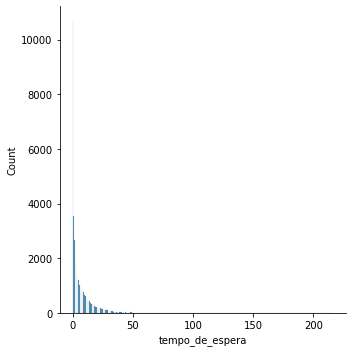

In [ ]:
sns.displot(dados.tempo_de_espera)

Exclusão de Outliers

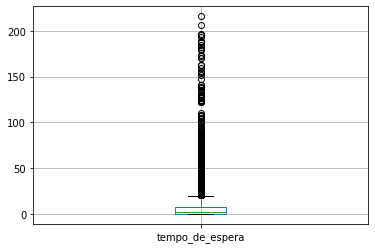

In [ ]:
dados.boxplot('tempo_de_espera')

Pelo gráfico acima percebe-se muitos outliers, para a exclusão utilizaremos o metodo do z-score. Exclui-se os registros que tem o z-score acima de 3 ou abaixo de -3

In [ ]:
#calculo do zscore
dados['te_zscore'] = (dados['tempo_de_espera'] - dados['tempo_de_espera'].mean())/dados['tempo_de_espera'].std(ddof=0)

In [ ]:
print(dados.shape)
dados.drop(index=dados[dados['te_zscore'] < -3].index.to_list(), inplace=True)
dados.drop(index=dados[dados['te_zscore'] > 3].index.to_list(), inplace=True)
print(dados.shape)
#418 registros foram excluídos

(31340, 17)
(30922, 17)


In [ ]:
dados.drop(columns='te_zscore',inplace=True)

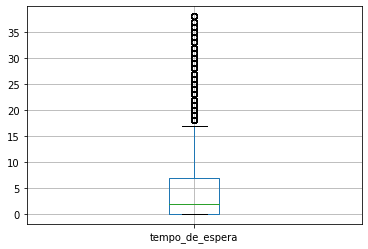

In [ ]:
dados.boxplot('tempo_de_espera')

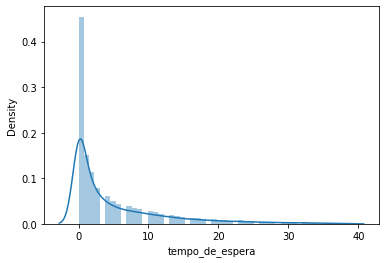

In [ ]:
sns.distplot(dados.tempo_de_espera)

Tempo de espera para senha de balcao

In [ ]:
teste = dados.copy()

In [ ]:
#para os registros de senha emitidas no balcão vou preencher o tempo de espera , com a média do dia
df = dados['Data Agendada'].isnull()
aux = dados[df]

for i,row in  aux[:].iterrows():
  dados.loc[i,'tempo_de_espera'] = dados[dados.dia_atendimento==row['dia_atendimento']]['tempo_de_espera'].mean()

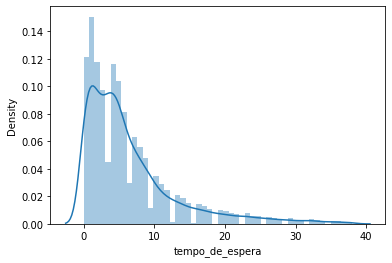

In [ ]:
sns.distplot(dados.tempo_de_espera)

In [ ]:
df = dados['Data Agendada'].isnull()
aux = dados[df]
aux

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,qtd_atendentes_dia,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera
1,NaT,12:03:00,58.0,2019-01-07,87,7,BCP1,12:03:00,12:08:00,4,Conclusivo,1,0,Cadastro - CPF Conclusão do Serviço Iniciado n...,5,3.793103
6,NaT,12:12:00,58.0,2019-01-07,87,7,BCP2,12:12:00,12:24:00,4,Conclusivo,2,1,Cadastro - CPF Conclusão do Serviço Iniciado n...,12,3.836702
10,NaT,12:25:00,58.0,2019-01-07,87,7,BCP3,12:25:00,12:31:00,4,Conclusivo,2,1,Cadastro - CPF Conclusão do Serviço Iniciado n...,6,3.880802
13,NaT,12:32:00,58.0,2019-01-07,87,7,BCP4,12:32:00,12:38:00,4,Conclusivo,2,1,Cadastro - CPF Conclusão do Serviço Iniciado n...,6,3.925409
15,NaT,12:36:00,58.0,2019-01-07,87,8,BCP5,12:36:00,12:39:00,4,Conclusivo,2,1,Cadastro - CPF Conclusão do Serviço Iniciado n...,3,3.970529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31234,NaT,15:48:00,70.0,2020-03-19,77,6,BCE1,15:48:00,15:59:00,5,Conclusivo,2,1,Certidões e Situação Fiscal - Certidão de Regu...,11,4.289474
31274,NaT,13:50:00,74.0,2020-03-20,82,2,BCP1,13:50:00,13:54:00,5,Conclusivo,3,2,Cadastro - CPF Conclusão do Serviço Iniciado n...,4,6.873418
31290,NaT,14:29:00,74.0,2020-03-20,82,2,BCP2,14:29:00,14:32:00,5,Conclusivo,2,2,Cadastro - CPF Conclusão do Serviço Iniciado n...,3,6.960423
31323,NaT,16:11:00,74.0,2020-03-20,82,7,BPA1,16:11:00,16:19:00,5,Conclusivo,1,1,Pagamentos e Parcelamentos - Parcel. Previdenc...,8,7.048530


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30922 entries, 0 to 31339
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada       23092 non-null  datetime64[ns]
 1   hora_agendada       30922 non-null  object        
 2   qtd_senha_agendada  30922 non-null  float64       
 3   dia_atendimento     30922 non-null  datetime64[ns]
 4   qtd_senha_atendida  30922 non-null  int64         
 5   atendente           30922 non-null  int64         
 6   senha               30922 non-null  object        
 7   Início              30922 non-null  object        
 8   Fim                 30922 non-null  object        
 9   qtd_atendentes_dia  30922 non-null  int64         
 10  estado              30922 non-null  object        
 11  fila                30922 non-null  int64         
 12  fila_de_espera      30922 non-null  int64         
 13  Serviço             30922 non-null  object    

In [ ]:

#para manter a corretude, vamos preencher o campo hora_agenda de acordo com o tempo de espera setado acima
for i,row in  aux[:].iterrows():
  
  ha = (datetime.strptime( row['Início'].strftime('%H:%M:%S'),'%H:%M:%S')-timedelta( minutes=row['tempo_de_espera']))
  #print(ha.strftime('%H:%M:%S'))
  dados.loc[i,'hora_agendada'] = datetime.strptime(ha.strftime('%H:%M:%S'),'%H:%M:%S').time()

In [ ]:
dados

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,qtd_atendentes_dia,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera
0,2019-01-07 12:00:00,12:00:00,58.0,2019-01-07,87,4,PEC1,12:01:00,12:07:00,4,Conclusivo,0,0,Certidões e Situação Fiscal - Certidão de Regu...,6,1.000000
1,NaT,11:59:12,58.0,2019-01-07,87,7,BCP1,12:03:00,12:08:00,4,Conclusivo,1,0,Cadastro - CPF Conclusão do Serviço Iniciado n...,5,3.793103
2,2019-01-07 12:05:00,12:05:00,58.0,2019-01-07,87,7,PRF1,12:10:00,12:11:00,4,Conclusivo,2,0,"Processo, Senhas e Procuração - Procuração RFB...",1,5.000000
3,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,0,CNF1,12:10:00,12:13:00,4,Conclusivo,1,1,Cadastro - CNPJ Inscrição,3,0.000000
4,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,4,COF1,12:11:00,12:11:00,4,Não compareceu,2,2,Certidões e Situação Fiscal - Certidão de Aver...,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31335,2020-03-20 16:50:00,16:50:00,74.0,2020-03-20,82,4,CPF11,16:53:00,17:04:00,5,Conclusivo,4,2,Cadastro - CPF Conclusão do Serviço Iniciado n...,11,3.000000
31336,2020-03-20 16:50:00,16:50:00,74.0,2020-03-20,82,6,MCJ1,16:52:00,16:52:00,5,Não compareceu,5,3,Cadastro - CNPJ Previdenciário Inscrição e Alt...,0,2.000000
31337,2020-03-20 17:00:00,17:00:00,74.0,2020-03-20,82,2,CPF12,17:01:00,17:06:00,5,Conclusivo,2,1,Cadastro - CPF Comprovante de Inscrição e Cons...,5,1.000000
31338,2020-03-20 17:00:00,17:00:00,74.0,2020-03-20,82,6,CPF13,17:01:00,17:08:00,5,Conclusivo,3,2,Cadastro - CPF Conclusão do Serviço Iniciado n...,7,1.000000


Fila

In [ ]:
dados.fila.describe()

count    30922.000000
mean         3.514003
std          2.594175
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         59.000000
Name: fila, dtype: float64

In [ ]:
dados[dados.dia_atendimento =='2019-02-08'][30:60]
#Data Agendada	hora_agendada	qtd_senha_agendada	dia_atendimento	qtd_senha_atendida	atendente	senha	Início	Fim	qtd_atendentes_dia	estado	fila	fila_de_espera	Serviço	duracao	tempo_de_espera

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,qtd_atendentes_dia,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera
2597,2019-02-08 11:40:00,11:40:00,102.0,2019-02-08,130,3,CPF5,11:41:00,12:28:00,6,Conclusivo,1,0,Cadastro - CPF Conclusão do Serviço Iniciado n...,47,1.000000
2598,2019-02-08 11:50:00,11:50:00,102.0,2019-02-08,130,7,CPF6,11:51:00,12:06:00,6,Conclusivo,1,0,Cadastro - CPF Conclusão do Serviço Iniciado n...,15,1.000000
2599,2019-02-08 12:00:00,12:00:00,102.0,2019-02-08,130,4,CPF7,12:04:00,12:09:00,6,Conclusivo,2,0,Cadastro - CPF Conclusão do Serviço Iniciado n...,5,4.000000
2600,2019-02-08 12:00:00,12:00:00,102.0,2019-02-08,130,3,MFF12,12:31:00,13:14:00,6,Conclusivo,3,1,Cobrança e Fiscalização - IRPF Impugnação,43,31.000000
2601,2019-02-08 12:10:00,12:10:00,102.0,2019-02-08,130,4,CPF8,12:10:00,12:14:00,6,Conclusivo,2,1,Cadastro - CPF Conclusão do Serviço Iniciado n...,4,0.000000
2602,2019-02-08 12:20:00,12:20:00,102.0,2019-02-08,130,6,MCF1,12:46:00,12:59:00,6,Conclusivo,2,1,"Cadastro - Matr. CEI Inscrição, Alteração, Can...",13,26.000000
2603,2019-02-08 12:20:00,12:20:00,102.0,2019-02-08,130,2,PFJ4,12:33:00,12:44:00,6,Conclusivo,3,2,Certidões e Situação Fiscal - Consulta Pendências,11,13.000000
2604,2019-02-08 12:20:00,12:20:00,102.0,2019-02-08,130,0,PRJ1,12:26:00,12:26:00,6,Não compareceu,4,3,"Processo, Senhas e Procuração - Procuração RFB...",0,6.000000
2605,2019-02-08 12:20:00,12:20:00,102.0,2019-02-08,130,4,RGJ1,12:20:00,12:33:00,6,Conclusivo,5,4,Cobrança e Fiscalização - Regularização de Déb...,13,0.000000
2606,2019-02-08 12:30:00,12:30:00,102.0,2019-02-08,130,2,DCJ1,12:47:00,12:53:00,6,Conclusivo,4,3,Cobrança e Fiscalização - Regularização Débito...,6,17.000000


In [ ]:
dados[dados.fila > 10]

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,qtd_atendentes_dia,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera
2383,2019-02-06 13:50:00,13:50:00,100.0,2019-02-06,134,7,PER6,13:56:00,13:56:00,6,Não compareceu,11,7,Pagamentos e Parcelamentos - Retificação de Pa...,0,6.000000
2384,2019-02-06 13:50:00,13:50:00,100.0,2019-02-06,134,4,PFX2,14:16:00,14:21:00,6,Conclusivo,12,8,Certidões e Situação Fiscal - Consulta Pendências,5,26.000000
2403,2019-02-06 14:40:00,14:40:00,100.0,2019-02-06,134,4,PGX1,15:06:00,15:06:00,6,Não compareceu,11,8,Dívida Ativa da União - DAU Entrega de Requeri...,0,26.000000
2616,2019-02-08 12:50:00,12:50:00,102.0,2019-02-08,130,4,PFS1,12:58:00,13:03:00,6,Conclusivo,11,7,Certidões e Situação Fiscal - Consulta Pendências,5,8.000000
2617,2019-02-08 12:50:00,12:50:00,102.0,2019-02-08,130,4,PFS1,13:03:00,13:03:00,6,Não compareceu,12,8,Declarações e Demonstrativos - Declaração IRPF...,0,0.000000
2618,2019-02-08 12:50:00,12:50:00,102.0,2019-02-08,130,6,PGJ2,13:14:00,13:37:00,6,Conclusivo com problemas no ambiente RFB,13,9,Dívida Ativa da União - DAU Entrega de Requeri...,23,24.000000
2619,2019-02-08 12:50:00,12:50:00,102.0,2019-02-08,130,0,PRJ5,13:24:00,13:24:00,6,Não compareceu,14,10,"Processo, Senhas e Procuração - Procuração RFB...",0,34.000000
2620,2019-02-08 12:50:00,12:50:00,102.0,2019-02-08,130,2,PTS1,13:05:00,13:08:00,6,Conclusivo,15,11,"Processo, Senhas e Procuração - Documentos Ret...",3,15.000000
2621,2019-02-08 13:00:00,13:00:00,102.0,2019-02-08,130,0,CNJ1,13:25:00,13:25:00,6,Não compareceu,11,8,Cadastro - CNPJ Alteração,0,25.000000
2622,2019-02-08 13:00:00,13:00:00,102.0,2019-02-08,130,3,MAF1,13:15:00,13:40:00,6,Conclusivo,12,9,Solicitação de Antecipação da Análise da DIRPF,25,15.000000


Ao verificar visualmente identificou-se que a distorção na quantidade de senhas na fila acontece em serviços chamados pelo atendente 0. Neste caso me lembro que o atendente 0 não fazia o mesmo serviço que os demais, somente recebia protocolos para serem executados por outros servidores. Assim decidi excluir o atendente 0 e recalcular a coluna fila.

In [ ]:
print(dados.shape)
dados.drop(index= dados[ dados.atendente == 0].index.to_list(),inplace=True)
print(dados.shape)

(30922, 16)
(28683, 16)


In [ ]:
dados.fila.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 14, 16,
       59, 50, 51, 32, 23, 24, 25, 17, 18, 19, 20, 21])

In [ ]:
#fila armazena a quantidade de senha em atendimento
fila = list()

remover = list()

reg_ant = datetime.strptime("01/01/2000","%d/%m/%Y")

for i,row in dados.loc[:].iterrows():
  if reg_ant < row["dia_atendimento"] :
 #   print("Mudou o dia, limpa a fila")
    fila.clear()
    

  remover.clear()
  for f in fila :
    
    if  dados.loc[f,"Fim"] <= row.hora_agendada:
      remover.append(f)

  for r in remover :
    fila.remove(r)     

  #considero na fila quem já está em atendimento e aguardando
  dados.loc[i,"fila"] = len(fila)   
  #verifico somente quem está aguardando e ainda não está em atendimento
  dados.loc[i,"fila_de_espera"] = len([f for f in fila if dados.loc[f,"Início"]>=row["hora_agendada"]])   
 
  fila.append(i)
  reg_ant =  datetime.strptime( dados.loc[i,"dia_atendimento"].strftime('%d/%m/%Y'),"%d/%m/%Y")

In [ ]:
dados.fila.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
dados.fila_de_espera.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
dados.fila.describe()

count    28683.000000
mean         3.561587
std          2.230103
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         15.000000
Name: fila, dtype: float64

# Tratando categoricas

In [ ]:
dados.senha = dados.senha.str[:3]

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28683 entries, 0 to 31339
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada       20964 non-null  datetime64[ns]
 1   hora_agendada       28683 non-null  object        
 2   qtd_senha_agendada  28683 non-null  float64       
 3   dia_atendimento     28683 non-null  datetime64[ns]
 4   qtd_senha_atendida  28683 non-null  int64         
 5   atendente           28683 non-null  int64         
 6   senha               28683 non-null  object        
 7   Início              28683 non-null  object        
 8   Fim                 28683 non-null  object        
 9   qtd_atendentes_dia  28683 non-null  int64         
 10  estado              28683 non-null  object        
 11  fila                28683 non-null  int64         
 12  fila_de_espera      28683 non-null  int64         
 13  Serviço             28683 non-null  object    

In [ ]:
encod_senha = dados.groupby('senha')['tempo_de_espera'].mean().round(2)
print(encod_senha)


senha
ADJ     7.20
AJF    18.31
BAJ     6.13
BCA     4.33
BCE     5.74
BCJ     4.54
BCO     6.56
BCP     5.70
BDC     5.53
BMC     5.81
BMF     5.57
BPA     5.57
BPG     5.47
BPQ     5.71
BPR     4.34
BPT     5.35
BRD     5.43
BRE     5.36
BRP     5.28
BTE     5.42
CAF     6.97
CAJ     8.82
CAS     5.32
CCF     5.27
CCJ     6.19
CCS     3.88
CCX     6.62
CNF     7.41
CNJ     6.47
CNS     3.83
CNX     4.32
COF     7.20
COJ     6.72
COS     8.04
COX     6.14
CPF     6.56
CPS     4.53
DCF     6.72
DCJ     9.15
EAO     5.22
EAR     5.03
EP1     6.55
EP2     4.99
EP3     8.37
MAF     8.62
MCF     5.67
MCJ     5.53
MCS     4.89
MCX     7.89
MFF    11.35
MFJ    12.59
MFS    10.92
ML1     5.47
ML2     5.27
ML3     6.90
PCF     6.06
PCJ     5.59
PCS     6.19
PCX     5.51
PEC     5.64
PEO     5.41
PER     5.38
PFF     7.11
PFJ     6.39
PFS     5.37
PFX     5.13
PGF     7.56
PGJ     6.01
PGS     3.00
PGX     7.29
PL1     7.16
PL2     5.50
PL3     6.01
PL4     6.07
PR1     7.00
PRF     7.10
PRJ   

In [ ]:
dados.groupby('senha').count()

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,Início,Fim,qtd_atendentes_dia,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera
senha,,,,,,,,,,,,,,,
ADJ,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
AJF,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
BAJ,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4
BCA,0,37,37,37,37,37,37,37,37,37,37,37,37,37,37
BCE,0,63,63,63,63,63,63,63,63,63,63,63,63,63,63
BCJ,0,38,38,38,38,38,38,38,38,38,38,38,38,38,38
BCO,0,97,97,97,97,97,97,97,97,97,97,97,97,97,97
BCP,0,5124,5124,5124,5124,5124,5124,5124,5124,5124,5124,5124,5124,5124,5124
BDC,0,185,185,185,185,185,185,185,185,185,185,185,185,185,185


In [ ]:
dados['senha'] = dados['senha'].map(encod_senha)

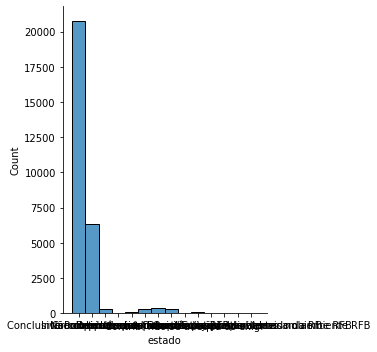

In [ ]:
sns.displot(dados['estado'])

In [ ]:
dados['estado'].value_counts()

Conclusivo                                                20753
Não compareceu                                             6365
Outros                                                      344
Interrompido com retorno                                    340
Desistência do contribuinte                                 315
Problemas com documentação/assinaturas                      291
Queda do sistema                                             92
Interrompido                                                 83
Conclusivo com problemas no ambiente RFB                     56
Contrib. não se adequa às exig.                              33
Interrompido por problemas no ambiente RFB                    6
Comunicado indevido da RF                                     3
Desistência do atendente                                      1
Interrompido com retorno por problemas no ambiente RFB        1
Name: estado, dtype: int64

In [ ]:
top = dados['estado'].isin(dados['estado'].value_counts().index[:2])
dados.loc[~top, 'estado'] = "other"

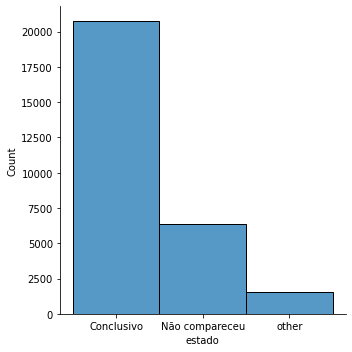

In [ ]:
sns.displot(dados['estado'])

In [ ]:
dados_sem_outliers = dados.copy()

# Criando colunas a partir de registros passados


Nossa variavel alvo (Tempo_de_espera) é depende da quantidade de atendentes no dia, quantidade de senhas agendada  e das outras características referentes às senhas que estão sendo atendidas. Ou seja, o tempo de espera vai variar  dependendo do registro anterior da senha que está sendo atendida( tipo de senha, duração, se foi conclusiva etc.)
Por isso vou fazer uma junção no dataframe para que meu registro referente a senha que está no momento de ser atendida, tenha colunas referentes às senhas que estão sendo atendidas e que determinarão o tempo de espera daquela senha.




In [ ]:
dados.reset_index(drop=True, inplace=True)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28683 entries, 0 to 28682
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada       20964 non-null  datetime64[ns]
 1   hora_agendada       28683 non-null  object        
 2   qtd_senha_agendada  28683 non-null  float64       
 3   dia_atendimento     28683 non-null  datetime64[ns]
 4   qtd_senha_atendida  28683 non-null  int64         
 5   atendente           28683 non-null  int64         
 6   senha               28683 non-null  float64       
 7   Início              28683 non-null  object        
 8   Fim                 28683 non-null  object        
 9   qtd_atendentes_dia  28683 non-null  int64         
 10  estado              28683 non-null  object        
 11  fila                28683 non-null  int64         
 12  fila_de_espera      28683 non-null  int64         
 13  Serviço             28683 non-null  object    

In [ ]:
#retirando colunas e deixando somente as que serão replicadas com os valores das senhas que estão na fila de atendimento
df = dados.drop(columns={"qtd_atendentes_dia","qtd_senha_agendada",'qtd_senha_atendida','Início','estado','Serviço'})

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28683 entries, 0 to 28682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data Agendada    20964 non-null  datetime64[ns]
 1   hora_agendada    28683 non-null  object        
 2   dia_atendimento  28683 non-null  datetime64[ns]
 3   atendente        28683 non-null  int64         
 4   senha            28683 non-null  float64       
 5   Fim              28683 non-null  object        
 6   fila             28683 non-null  int64         
 7   fila_de_espera   28683 non-null  int64         
 8   duracao          28683 non-null  int64         
 9   tempo_de_espera  28683 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 2.2+ MB


In [ ]:
df.columns = ["Data Agendada_t1","hora_agendada_t1",'dia_atendimento_t1',"atendente_t1",'senha_t1',"Fim_t1","fila_t1",'fila_de_espera_t1','duracao_t1','tempo_de_espera_t1']
df.head()

,Data Agendada_t1,hora_agendada_t1,dia_atendimento_t1,atendente_t1,senha_t1,Fim_t1,fila_t1,fila_de_espera_t1,duracao_t1,tempo_de_espera_t1
0,2019-01-07 12:00:00,12:00:00,2019-01-07,4,5.64,12:07:00,0,0,6,1.000000
1,NaT,11:59:12,2019-01-07,7,5.70,12:08:00,1,1,5,3.793103
2,2019-01-07 12:05:00,12:05:00,2019-01-07,7,7.10,12:11:00,2,0,1,5.000000
3,2019-01-07 12:10:00,12:10:00,2019-01-07,4,7.20,12:11:00,1,1,0,1.000000
4,2019-01-07 12:10:00,12:10:00,2019-01-07,4,11.35,12:13:00,2,2,0,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28683 entries, 0 to 28682
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada_t1    20964 non-null  datetime64[ns]
 1   hora_agendada_t1    28683 non-null  object        
 2   dia_atendimento_t1  28683 non-null  datetime64[ns]
 3   atendente_t1        28683 non-null  int64         
 4   senha_t1            28683 non-null  float64       
 5   Fim_t1              28683 non-null  object        
 6   fila_t1             28683 non-null  int64         
 7   fila_de_espera_t1   28683 non-null  int64         
 8   duracao_t1          28683 non-null  int64         
 9   tempo_de_espera_t1  28683 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 2.2+ MB


execução demora ~10min

In [ ]:
#Definições de variaveis auxiliares
novo = pd.DataFrame()
left = pd.DataFrame() #recebe as senhas que estão na fila ou em execução
right = pd.DataFrame() #recebe a nova senha que entrou na fila
fila = list() #faz o controle de qual senha está na fila
remover = list() 
match = 0 #indica se encontrou na fila a senha que antecedeu a nova senha


reg_ant = datetime.strptime("01/01/2000","%d/%m/%Y")  
for i,row in dados.loc[:].iterrows():
 
  if reg_ant < row["dia_atendimento"] :
    fila.clear()
  
  remover.clear()  
  
  for f in fila :
    if (dados.loc[f,'atendente']==row['atendente']):
      match = f
    if df.loc[f,'Fim_t1'] <= row["hora_agendada"] :
      remover.append(f)
      
  if match == 0:
    for f in fila :
      if f not in remover:
         left = pd.concat([left,dados.loc[[f]]])
         right = pd.concat([right, df.loc[[i]] ])
         break;   
  else:
    left = pd.concat([left, dados.loc[[match]] ])
    right = pd.concat([right, df.loc[[i]] ])

  for r in remover :
    fila.remove(r) 

  fila.append(i)
  reg_ant =  datetime.strptime( dados.loc[i,"dia_atendimento"].strftime('%d/%m/%Y'),"%d/%m/%Y")
  match = 0
  

In [ ]:
left.shape

(28107, 16)

In [ ]:
right.shape

(28107, 10)

In [ ]:
left.reset_index(drop=True, inplace=True)
right.reset_index(drop=True, inplace=True)
novo = pd.concat([left,right],axis=1)
novo

,Data Agendada,hora_agendada,qtd_senha_agendada,dia_atendimento,qtd_senha_atendida,atendente,senha,Início,Fim,qtd_atendentes_dia,estado,fila,fila_de_espera,Serviço,duracao,tempo_de_espera,Data Agendada_t1,hora_agendada_t1,dia_atendimento_t1,atendente_t1,senha_t1,Fim_t1,fila_t1,fila_de_espera_t1,duracao_t1,tempo_de_espera_t1
0,2019-01-07 12:00:00,12:00:00,58.0,2019-01-07,87,4,5.64,12:01:00,12:07:00,4,Conclusivo,0,0,Certidões e Situação Fiscal - Certidão de Regu...,6,1.000000,NaT,11:59:12,2019-01-07,7,5.70,12:08:00,1,1,5,3.793103
1,NaT,11:59:12,58.0,2019-01-07,87,7,5.70,12:03:00,12:08:00,4,Conclusivo,1,1,Cadastro - CPF Conclusão do Serviço Iniciado n...,5,3.793103,2019-01-07 12:05:00,12:05:00,2019-01-07,7,7.10,12:11:00,2,0,1,5.000000
2,2019-01-07 12:05:00,12:05:00,58.0,2019-01-07,87,7,7.10,12:10:00,12:11:00,4,Conclusivo,2,0,"Processo, Senhas e Procuração - Procuração RFB...",1,5.000000,2019-01-07 12:10:00,12:10:00,2019-01-07,4,7.20,12:11:00,1,1,0,1.000000
3,2019-01-07 12:10:00,12:10:00,58.0,2019-01-07,87,4,7.20,12:11:00,12:11:00,4,Não compareceu,1,1,Certidões e Situação Fiscal - Certidão de Aver...,0,1.000000,2019-01-07 12:10:00,12:10:00,2019-01-07,4,11.35,12:13:00,2,2,0,3.000000
4,2019-01-07 12:05:00,12:05:00,58.0,2019-01-07,87,7,7.10,12:10:00,12:11:00,4,Conclusivo,2,0,"Processo, Senhas e Procuração - Procuração RFB...",1,5.000000,NaT,12:08:09,2019-01-07,7,5.70,12:24:00,3,3,12,3.836702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28102,NaT,16:40:51,74.0,2020-03-20,82,4,5.70,16:48:00,16:51:00,5,Conclusivo,3,3,Cadastro - CPF Conclusão do Serviço Iniciado n...,3,7.137752,2020-03-20 16:50:00,16:50:00,2020-03-20,4,6.56,17:04:00,4,2,11,3.000000
28103,2020-03-20 16:50:00,16:50:00,74.0,2020-03-20,82,6,6.56,16:55:00,16:55:00,5,Não compareceu,3,1,Cadastro - CPF Comprovante de Inscrição e Cons...,0,5.000000,2020-03-20 16:50:00,16:50:00,2020-03-20,6,5.53,16:52:00,5,3,0,2.000000
28104,2020-03-20 16:40:00,16:40:00,74.0,2020-03-20,82,2,6.56,16:42:00,16:55:00,5,Conclusivo,1,1,Cadastro - CPF Conclusão do Serviço Iniciado n...,13,2.000000,2020-03-20 17:00:00,17:00:00,2020-03-20,2,6.56,17:06:00,2,1,5,1.000000
28105,2020-03-20 16:40:00,16:40:00,74.0,2020-03-20,82,7,11.35,17:01:00,17:05:00,5,Conclusivo,2,2,Cobrança e Fiscalização - IRPF - Intimação/SRL...,4,21.000000,2020-03-20 17:00:00,17:00:00,2020-03-20,6,6.56,17:08:00,3,2,7,1.000000


In [ ]:
novo.insert(10,"tempo_em_execucao",0,allow_duplicates=True)

In [ ]:
for i,row in novo[:].iterrows():
  if ((row['Fim']>row['hora_agendada_t1']) & (row['Início'] <= row['hora_agendada_t1'])):
    dur = datetime.strptime( row['hora_agendada_t1'].strftime('%H:%M:%S'),'%H:%M:%S')-datetime.strptime( row['Início'].strftime('%H:%M:%S'),'%H:%M:%S')
    dur = dur.total_seconds() / 60
    novo.loc[i,'tempo_em_execucao'] = dur


In [ ]:
novo.tempo_em_execucao.unique()

array([ 0.        ,  2.        ,  9.11666667, ..., 86.66666667,
       90.        , 27.53333333])

In [ ]:
novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28107 entries, 0 to 28106
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada       21264 non-null  datetime64[ns]
 1   hora_agendada       28107 non-null  object        
 2   qtd_senha_agendada  28107 non-null  float64       
 3   dia_atendimento     28107 non-null  datetime64[ns]
 4   qtd_senha_atendida  28107 non-null  int64         
 5   atendente           28107 non-null  int64         
 6   senha               28107 non-null  float64       
 7   Início              28107 non-null  object        
 8   Fim                 28107 non-null  object        
 9   qtd_atendentes_dia  28107 non-null  int64         
 10  tempo_em_execucao   28107 non-null  float64       
 11  estado              28107 non-null  object        
 12  fila                28107 non-null  int64         
 13  fila_de_espera      28107 non-null  int64     

In [ ]:
novo.drop(columns={'Data Agendada','dia_atendimento','hora_agendada','Início','Serviço','Fim','Data Agendada_t1','dia_atendimento_t1','hora_agendada_t1','Fim_t1'},axis=1,inplace=True)

In [ ]:
novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28107 entries, 0 to 28106
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qtd_senha_agendada  28107 non-null  float64
 1   qtd_senha_atendida  28107 non-null  int64  
 2   atendente           28107 non-null  int64  
 3   senha               28107 non-null  float64
 4   qtd_atendentes_dia  28107 non-null  int64  
 5   tempo_em_execucao   28107 non-null  float64
 6   estado              28107 non-null  object 
 7   fila                28107 non-null  int64  
 8   fila_de_espera      28107 non-null  int64  
 9   duracao             28107 non-null  int64  
 10  tempo_de_espera     28107 non-null  float64
 11  atendente_t1        28107 non-null  int64  
 12  senha_t1            28107 non-null  float64
 13  fila_t1             28107 non-null  int64  
 14  fila_de_espera_t1   28107 non-null  int64  
 15  duracao_t1          28107 non-null  int64  
 16  temp

In [ ]:
dados = novo

Deixei somente variaveis que numa possível implementação estarão disponíveis. Por exemplo não tenho a duração de uma senha que acabou de entrar na fila, mas tenho que prever o tempo de espera. Assim não criei a variavel duração(t+1)

# Explorando

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28107 entries, 0 to 28106
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qtd_senha_agendada  28107 non-null  float64
 1   qtd_senha_atendida  28107 non-null  int64  
 2   atendente           28107 non-null  int64  
 3   senha               28107 non-null  float64
 4   qtd_atendentes_dia  28107 non-null  int64  
 5   tempo_em_execucao   28107 non-null  float64
 6   estado              28107 non-null  object 
 7   fila                28107 non-null  int64  
 8   fila_de_espera      28107 non-null  int64  
 9   duracao             28107 non-null  int64  
 10  tempo_de_espera     28107 non-null  float64
 11  atendente_t1        28107 non-null  int64  
 12  senha_t1            28107 non-null  float64
 13  fila_t1             28107 non-null  int64  
 14  fila_de_espera_t1   28107 non-null  int64  
 15  duracao_t1          28107 non-null  int64  
 16  temp

In [ ]:
dados.isnull().sum()

qtd_senha_agendada    0
qtd_senha_atendida    0
atendente             0
senha                 0
qtd_atendentes_dia    0
tempo_em_execucao     0
estado                0
fila                  0
fila_de_espera        0
duracao               0
tempo_de_espera       0
atendente_t1          0
senha_t1              0
fila_t1               0
fila_de_espera_t1     0
duracao_t1            0
tempo_de_espera_t1    0
dtype: int64

In [ ]:
dados.describe()

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,tempo_em_execucao,fila,fila_de_espera,duracao,tempo_de_espera,atendente_t1,senha_t1,fila_t1,fila_de_espera_t1,duracao_t1,tempo_de_espera_t1
count,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000,28107.000000
mean,78.191483,106.550041,4.339453,6.995033,5.830718,4.321826,3.292240,1.734123,10.606860,7.503058,4.297968,6.813804,3.634575,1.928239,7.773829,6.833451
std,14.219014,18.042111,2.052539,1.913695,1.052229,8.548760,2.275402,1.658962,12.665035,7.497130,2.058971,1.722040,2.193170,1.673995,9.533488,6.782141
min,22.000000,21.000000,1.000000,2.850000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.850000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,96.000000,2.000000,5.700000,5.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,5.700000,2.000000,1.000000,1.000000,2.000000
50%,77.000000,105.000000,4.000000,6.560000,6.000000,0.000000,3.000000,1.000000,7.000000,5.000000,4.000000,6.470000,3.000000,2.000000,6.000000,5.000000
75%,86.000000,117.000000,6.000000,7.410000,7.000000,6.000000,5.000000,3.000000,14.000000,10.000000,6.000000,7.200000,5.000000,3.000000,11.000000,9.000000
max,116.000000,155.000000,9.000000,18.310000,9.000000,193.000000,15.000000,13.000000,200.000000,38.000000,9.000000,18.310000,15.000000,13.000000,200.000000,38.000000


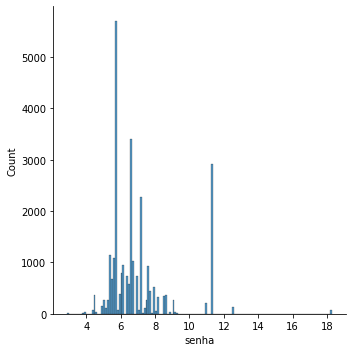

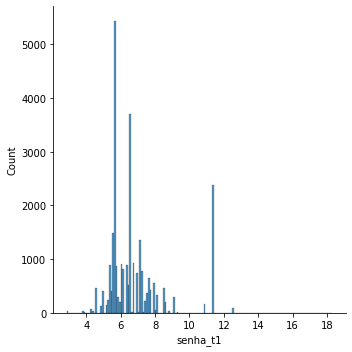

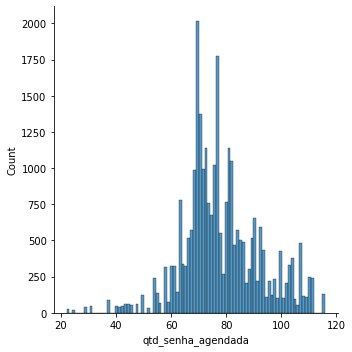

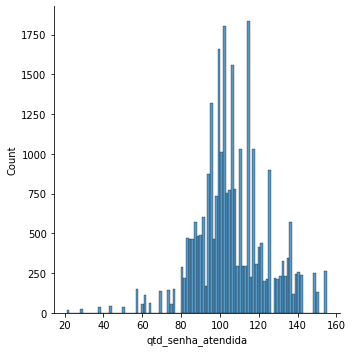

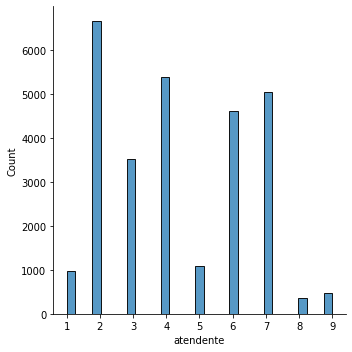

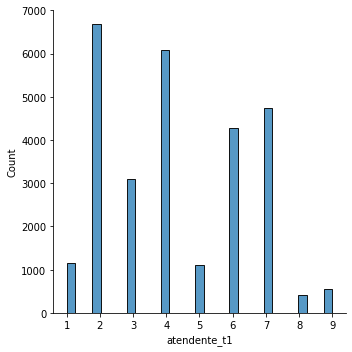

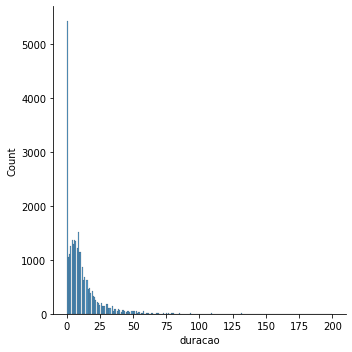

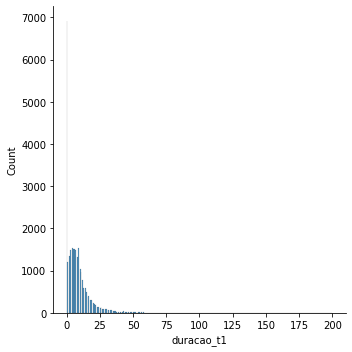

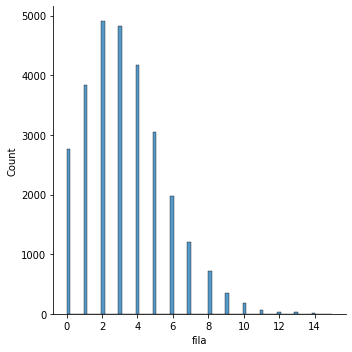

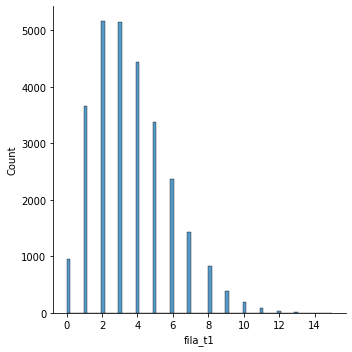

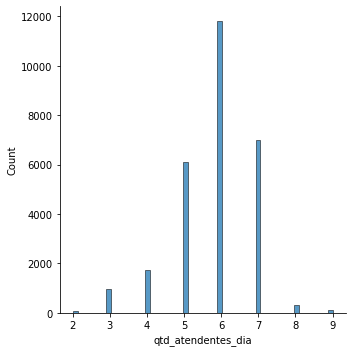

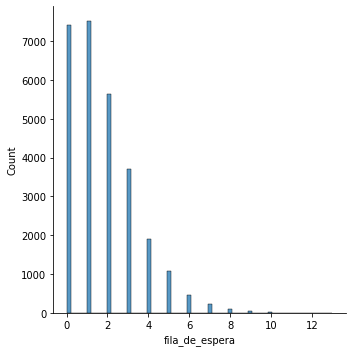

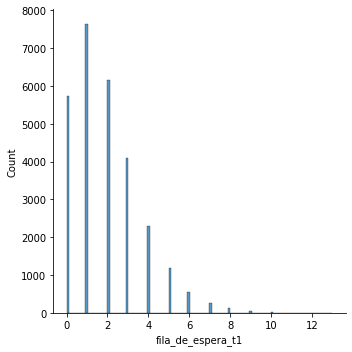

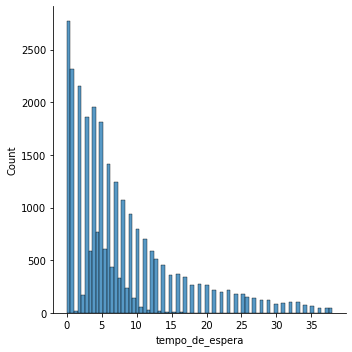

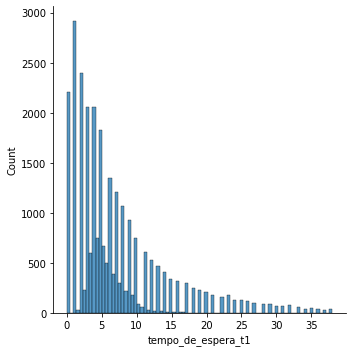

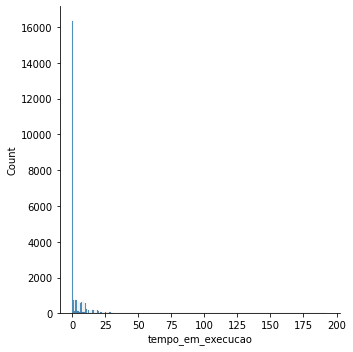

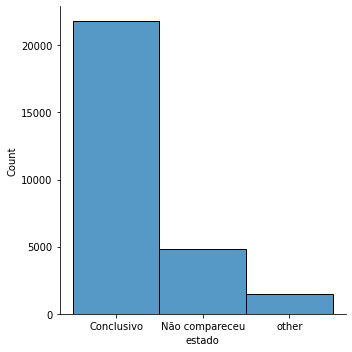

In [ ]:
sns.displot(dados['senha'])
sns.displot(dados['senha_t1'])
sns.displot(dados['qtd_senha_agendada'])
sns.displot(dados['qtd_senha_atendida'])
sns.displot(dados['atendente'])
sns.displot(dados['atendente_t1'])
sns.displot(dados['duracao'])
sns.displot(dados['duracao_t1'])
sns.displot(dados['fila'])
sns.displot(dados['fila_t1'])
sns.displot(dados['qtd_atendentes_dia'])
sns.displot(dados['fila_de_espera'])
sns.displot(dados['fila_de_espera_t1'])
sns.displot(dados['tempo_de_espera'])
sns.displot(dados['tempo_de_espera_t1'])
sns.displot(dados['tempo_em_execucao'])
sns.displot(dados['estado'])


In [ ]:
dados.duracao.value_counts()

0      5433
9      1522
4      1368
6      1364
7      1346
5      1289
3      1262
8      1216
11     1141
10     1140
2      1113
1      1049
12      873
14      676
13      636
15      633
17      483
16      462
19      421
18      391
20      325
21      309
22      265
23      225
24      202
26      197
31      191
30      174
25      159
29      152
27      142
34      141
28      141
33      116
32      106
39       91
37       90
36       83
43       72
42       64
40       63
35       60
46       57
58       56
38       56
44       51
51       49
50       47
52       46
49       45
47       43
41       41
55       36
45       32
54       31
48       29
62       24
56       21
75       20
61       19
65       18
67       15
79       15
73       15
57       14
60       13
53       10
85       10
69        8
109       8
80        8
93        7
64        7
68        6
81        6
132       6
77        6
103       5
63        5
106       5
59        5
144       4
121       4
87  

In [ ]:
dados.estado.value_counts()

Conclusivo        21801
Não compareceu     4856
other              1450
Name: estado, dtype: int64

In [ ]:
dados.groupby('fila_de_espera_t1')['tempo_de_espera_t1'].count()

fila_de_espera_t1
0     5726
1     7650
2     6150
3     4086
4     2299
5     1174
6      554
7      271
8      118
9       47
10      21
11       8
12       2
13       1
Name: tempo_de_espera_t1, dtype: int64

In [ ]:
dados.groupby('fila_de_espera_t1')['tempo_de_espera_t1'].mean()

fila_de_espera_t1
0      5.134781
1      6.188298
2      7.030147
3      7.321918
4      7.902584
5      9.447058
6     11.410417
7     12.935036
8     16.090013
9     15.514228
10    13.519229
11    15.558723
12    16.499517
13    18.000000
Name: tempo_de_espera_t1, dtype: float64

In [ ]:
dados.groupby('qtd_atendentes_dia')['tempo_de_espera_t1'].mean()

qtd_atendentes_dia
2    3.169301
3    6.521188
4    8.331932
5    7.992420
6    7.258538
7    4.926066
8    4.866132
9    4.960247
Name: tempo_de_espera_t1, dtype: float64

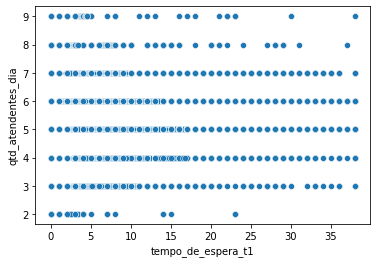

In [ ]:
sns.scatterplot(dados.tempo_de_espera_t1,dados.qtd_atendentes_dia)

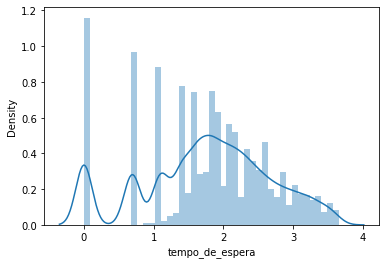

In [ ]:
sns.distplot(np.log1p(dados['tempo_de_espera']))

In [ ]:
#sns.pairplot(dados)

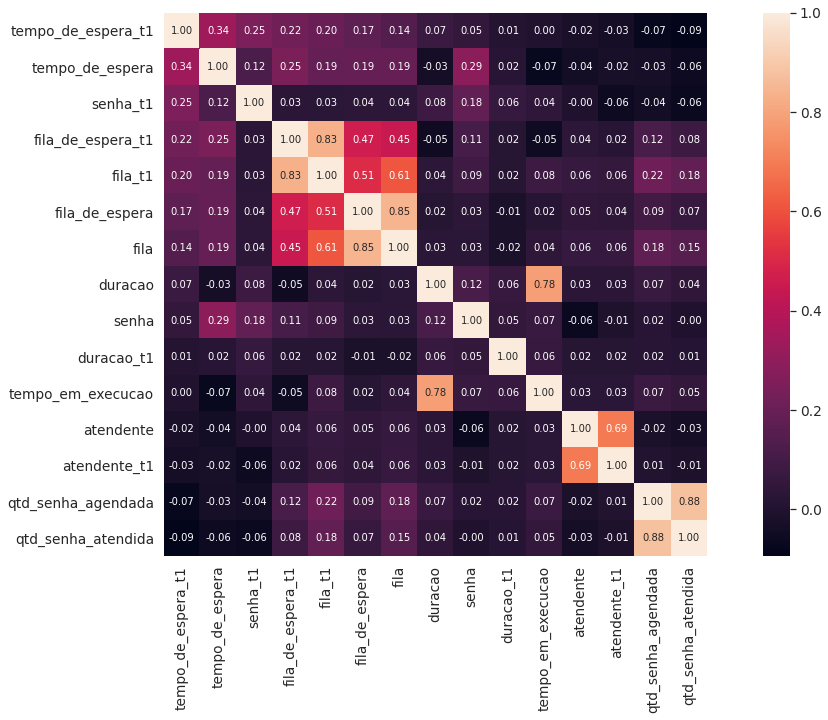

In [ ]:
corrmat = dados.corr()
plt.figure(figsize=(20,10))
k = 15 #qtd de variaveis para o heatmap
cols = corrmat.nlargest(k, 'tempo_de_espera_t1')['tempo_de_espera_t1'].index
cm = np.corrcoef(dados[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28107 entries, 0 to 28106
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qtd_senha_agendada  28107 non-null  float64
 1   qtd_senha_atendida  28107 non-null  int64  
 2   atendente           28107 non-null  int64  
 3   senha               28107 non-null  float64
 4   qtd_atendentes_dia  28107 non-null  int64  
 5   tempo_em_execucao   28107 non-null  float64
 6   estado              28107 non-null  object 
 7   fila                28107 non-null  int64  
 8   fila_de_espera      28107 non-null  int64  
 9   duracao             28107 non-null  int64  
 10  tempo_de_espera     28107 non-null  float64
 11  atendente_t1        28107 non-null  int64  
 12  senha_t1            28107 non-null  float64
 13  fila_t1             28107 non-null  int64  
 14  fila_de_espera_t1   28107 non-null  int64  
 15  duracao_t1          28107 non-null  int64  
 16  temp

In [ ]:
from scipy import stats
from scipy.stats import spearmanr
data1=dados.filter(items={'senha','senha_t1','duracao','duracao_t1','qtd_senha_agendada','qtd_atendentes_dia','qtd_senha_atendida','tempo_em_execucao'})
data2 = dados['tempo_de_espera_t1']

for row in data1.columns:
  print(row)
  coef, p = spearmanr(data1[row], data2)
  print('Coeficiente de correlação Spearmans : %.3f' % coef)
#print(coef)
#print(p)
  # utilizando uma confiança de 5%
  alpha = 0.05
  if p > alpha:
  	print('### SEM CORRELAÇÃO (não rejeita H0) p=%.3f' % p)
  else:
  	print('Correlacionados (reject H0) p=%.3f' % p)
  print('**************')

qtd_senha_agendada
Coeficiente de correlação Spearmans : -0.095
Correlacionados (reject H0) p=0.000
**************
senha
Coeficiente de correlação Spearmans : 0.017
Correlacionados (reject H0) p=0.005
**************
qtd_senha_atendida
Coeficiente de correlação Spearmans : -0.123
Correlacionados (reject H0) p=0.000
**************
duracao_t1
Coeficiente de correlação Spearmans : 0.006
### SEM CORRELAÇÃO (não rejeita H0) p=0.293
**************
duracao
Coeficiente de correlação Spearmans : 0.036
Correlacionados (reject H0) p=0.000
**************
tempo_em_execucao
Coeficiente de correlação Spearmans : 0.029
Correlacionados (reject H0) p=0.000
**************
qtd_atendentes_dia
Coeficiente de correlação Spearmans : -0.189
Correlacionados (reject H0) p=0.000
**************
senha_t1
Coeficiente de correlação Spearmans : 0.117
Correlacionados (reject H0) p=0.000
**************


Correlação dos dados categoricos

In [ ]:
data1 = dados.filter(items=['senha','estado','atendente','fila','fila_de_espera','fila_t1','fila_de_espera_t1','tempo_de_espera_t1'])

corr = data1.corr(method='kendall')
corr

,senha,atendente,fila,fila_de_espera,fila_t1,fila_de_espera_t1,tempo_de_espera_t1
senha,1.000000,-0.008738,0.024468,0.033882,0.075185,0.106535,0.012062
atendente,-0.008738,1.000000,0.060577,0.047516,0.062173,0.040488,-0.038432
fila,0.024468,0.060577,1.000000,0.717429,0.483382,0.312470,0.072119
fila_de_espera,0.033882,0.047516,0.717429,1.000000,0.386253,0.322460,0.088438
fila_t1,0.075185,0.062173,0.483382,0.386253,1.000000,0.695253,0.132484
fila_de_espera_t1,0.106535,0.040488,0.312470,0.322460,0.695253,1.000000,0.141758
tempo_de_espera_t1,0.012062,-0.038432,0.072119,0.088438,0.132484,0.141758,1.000000


In [ ]:
from scipy.stats import kendalltau
#data1 = dados.filter(items=['senha','atendente','estado_cod','atendente(t+1)','estado_cod(t+1)','senha(t+1)'])

data2 = dados['tempo_de_espera_t1']

for row in data1.columns:
  print(row)
  coef, p = kendalltau(data1[row], data2)
  print('coeficiente de correlação Kendall: %.3f' % coef)
  # confiança
  alpha = 0.05
  if p > alpha:
	  print('**NÃO CORRELACIONADOS** p=%.3f' % p)
  else:
	  print('correlacionados p=%.3f' % p)
  print("*******************")

senha
coeficiente de correlação Kendall: 0.012
correlacionados p=0.004
*******************
estado
coeficiente de correlação Kendall: -0.030
correlacionados p=0.000
*******************
atendente
coeficiente de correlação Kendall: -0.038
correlacionados p=0.000
*******************
fila
coeficiente de correlação Kendall: 0.072
correlacionados p=0.000
*******************
fila_de_espera
coeficiente de correlação Kendall: 0.088
correlacionados p=0.000
*******************
fila_t1
coeficiente de correlação Kendall: 0.132
correlacionados p=0.000
*******************
fila_de_espera_t1
coeficiente de correlação Kendall: 0.142
correlacionados p=0.000
*******************
tempo_de_espera_t1
coeficiente de correlação Kendall: 1.000
correlacionados p=0.000
*******************


# target Encoding - Variavel Senha

In [ ]:
n_senha1 = novo.groupby('senha_t1')['tempo_de_espera_t1'].mean()
novo['senha_t1'] = novo['senha_t1'].map(n_senha1)

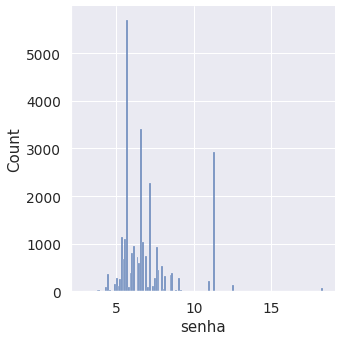

In [ ]:
sns.displot(novo['senha'])

In [ ]:
n_senha1 = novo.groupby('senha')['tempo_de_espera_t1'].mean()
novo['senha'] = novo['senha'].map(n_senha1)

# CRIANDO O MODELO - Dados sem tratamento


**Utilizando o Pycaret para comparar qual o melhor algoritmo e criar o modelo**

In [ ]:
dados_com_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31340 entries, 0 to 31339
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada       23510 non-null  datetime64[ns]
 1   hora_agendada       31340 non-null  object        
 2   qtd_senha_agendada  31340 non-null  float64       
 3   dia_atendimento     31340 non-null  datetime64[ns]
 4   qtd_senha_atendida  31340 non-null  int64         
 5   atendente           31340 non-null  int64         
 6   senha               31340 non-null  object        
 7   Início              31340 non-null  object        
 8   Fim                 31340 non-null  object        
 9   qtd_atendentes_dia  31340 non-null  int64         
 10  estado              31340 non-null  object        
 11  fila                31340 non-null  int64         
 12  fila_de_espera      31340 non-null  int64         
 13  Serviço             31340 non-null  object    

In [ ]:

df = dados_com_outliers.drop(columns={'Data Agendada','dia_atendimento','hora_agendada','Início','Fim', 'Serviço'})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31340 entries, 0 to 31339
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qtd_senha_agendada  31340 non-null  float64
 1   qtd_senha_atendida  31340 non-null  int64  
 2   atendente           31340 non-null  int64  
 3   senha               31340 non-null  object 
 4   qtd_atendentes_dia  31340 non-null  int64  
 5   estado              31340 non-null  object 
 6   fila                31340 non-null  int64  
 7   fila_de_espera      31340 non-null  int64  
 8   duracao             31340 non-null  int64  
 9   tempo_de_espera     31340 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 2.4+ MB


In [ ]:
df

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,estado,fila,fila_de_espera,duracao,tempo_de_espera
0,58.0,87,4,PEC1,4,Conclusivo,0,0,6,1
1,58.0,87,7,BCP1,4,Conclusivo,1,0,5,0
2,58.0,87,7,PRF1,4,Conclusivo,2,0,1,5
3,58.0,87,0,CNF1,4,Conclusivo,1,1,3,0
4,58.0,87,4,COF1,4,Não compareceu,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...
31335,74.0,82,4,CPF11,5,Conclusivo,4,2,11,3
31336,74.0,82,6,MCJ1,5,Não compareceu,5,3,0,2
31337,74.0,82,2,CPF12,5,Conclusivo,2,1,5,1
31338,74.0,82,6,CPF13,5,Conclusivo,3,2,7,1


In [ ]:
df.senha = df.senha.str[:3]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31340 entries, 0 to 31339
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qtd_senha_agendada  31340 non-null  float64
 1   qtd_senha_atendida  31340 non-null  int64  
 2   atendente           31340 non-null  int64  
 3   senha               31340 non-null  object 
 4   qtd_atendentes_dia  31340 non-null  int64  
 5   estado              31340 non-null  object 
 6   fila                31340 non-null  int64  
 7   fila_de_espera      31340 non-null  int64  
 8   duracao             31340 non-null  int64  
 9   tempo_de_espera     31340 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 2.4+ MB


Separando uma parte dos dados para avaliar o modelo implementado. Assim teremos uma base para modelar e dados não vistos para avaliar.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Dados para o Modelo: ' + str(data.shape))
print('Dados não vistos para predição: ' + str(data_unseen.shape))

Dados para o Modelo: (28206, 10)
Dados não vistos para predição: (3134, 10)


In [ ]:
train, test = train_test_split( data, test_size=0.3, 
                                     random_state=42)

In [ ]:
print(len(train))
print(len(test))

19744
8462


In [ ]:
train.describe()

,qtd_senha_agendada,qtd_senha_atendida,atendente,qtd_atendentes_dia,fila,fila_de_espera,duracao,tempo_de_espera
count,19744.000000,19744.000000,19744.000000,19744.000000,19744.000000,19744.000000,19744.000000,19744.000000
mean,78.549028,106.998531,3.971840,5.852411,3.585849,1.952441,7.231513,5.880166
std,14.339313,18.057101,2.268914,1.041798,2.908057,2.429811,9.312683,10.717289
min,22.000000,21.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,96.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,77.000000,105.000000,4.000000,6.000000,3.000000,1.000000,5.000000,2.000000
75%,86.000000,117.000000,6.000000,7.000000,5.000000,3.000000,10.000000,8.000000
max,116.000000,155.000000,9.000000,9.000000,61.000000,59.000000,200.000000,216.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19744 entries, 27284 to 23654
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qtd_senha_agendada  19744 non-null  float64
 1   qtd_senha_atendida  19744 non-null  int64  
 2   atendente           19744 non-null  int64  
 3   senha               19744 non-null  object 
 4   qtd_atendentes_dia  19744 non-null  int64  
 5   estado              19744 non-null  object 
 6   fila                19744 non-null  int64  
 7   fila_de_espera      19744 non-null  int64  
 8   duracao             19744 non-null  int64  
 9   tempo_de_espera     19744 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.7+ MB


Após dividir a base de treino e teste, vamos normalizar todos os campos

In [ ]:
reg = setup(data = train,           # Banco de dados
              target = 'tempo_de_espera',   # o que estamos tentando prever
              train_size = 0.7  
      )     # Proporção do banco de treino

,Description,Value
0,session_id,2982
1,Target,tempo_de_espera
2,Original Data,"(19744, 10)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13820, 135)"


In [ ]:
compare_models( round = 4,  sort = 'mae')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.456400e+00,7.345580e+01,8.518000e+00,3.667000e-01,0.8824,1.366000e+00,7.354
lightgbm,Light Gradient Boosting Machine,4.478700e+00,6.897130e+01,8.280100e+00,3.977000e-01,0.8920,1.346100e+00,0.172
et,Extra Trees Regressor,4.591100e+00,7.715940e+01,8.744300e+00,3.300000e-01,0.8919,1.434000e+00,7.828
huber,Huber Regressor,4.614100e+00,9.677380e+01,9.790400e+00,1.642000e-01,0.9207,9.800000e-01,0.901
gbr,Gradient Boosting Regressor,4.687000e+00,7.201920e+01,8.440100e+00,3.780000e-01,0.9536,1.418300e+00,1.771
br,Bayesian Ridge,4.972300e+00,8.392250e+01,9.126300e+00,2.720000e-01,1.0034,1.521100e+00,0.116
ridge,Ridge Regression,4.976000e+00,8.379590e+01,9.120400e+00,2.727000e-01,1.0033,1.529000e+00,0.031
lr,Linear Regression,4.990600e+00,8.434850e+01,9.152400e+00,2.671000e-01,1.0047,1.535600e+00,0.244
omp,Orthogonal Matching Pursuit,5.151700e+00,8.780680e+01,9.340400e+00,2.366000e-01,1.0396,1.521300e+00,0.031
knn,K Neighbors Regressor,5.543100e+00,1.058253e+02,1.026600e+01,6.760000e-02,1.1384,1.371000e+00,0.292


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2982, verbose=0, warm_start=False)

In [ ]:
model_tcc = create_model('rf')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.2109,57.4596,7.5802,0.3455,0.8802,1.5063
1,4.4660,62.3999,7.8994,0.3541,0.8887,1.3806
2,4.5743,80.8092,8.9894,0.4128,0.9052,1.3219
3,4.5187,82.2963,9.0717,0.3480,0.8933,1.2290
4,4.1427,50.5662,7.1110,0.4518,0.8763,1.3288
5,4.5604,95.1979,9.7569,0.3271,0.8808,1.5007
6,4.4445,57.1949,7.5627,0.3709,0.8954,1.3934
7,4.5701,71.4795,8.4546,0.4380,0.8652,1.3100
8,4.5442,73.4734,8.5717,0.3759,0.8888,1.3133
9,4.5322,103.6816,10.1824,0.2431,0.8497,1.3756


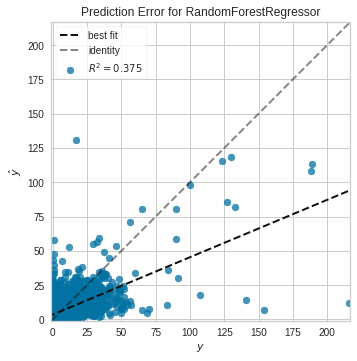

In [ ]:
plot_model(model_tcc,plot='error')



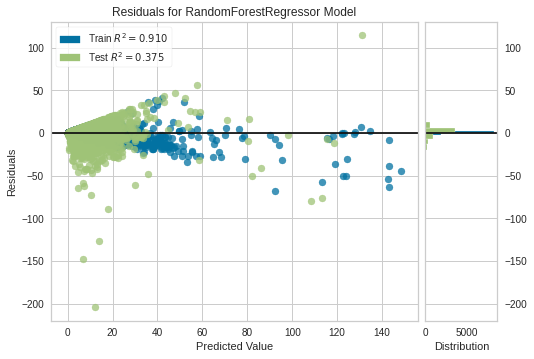

In [ ]:
plot_model(model_tcc, plot='residuals')

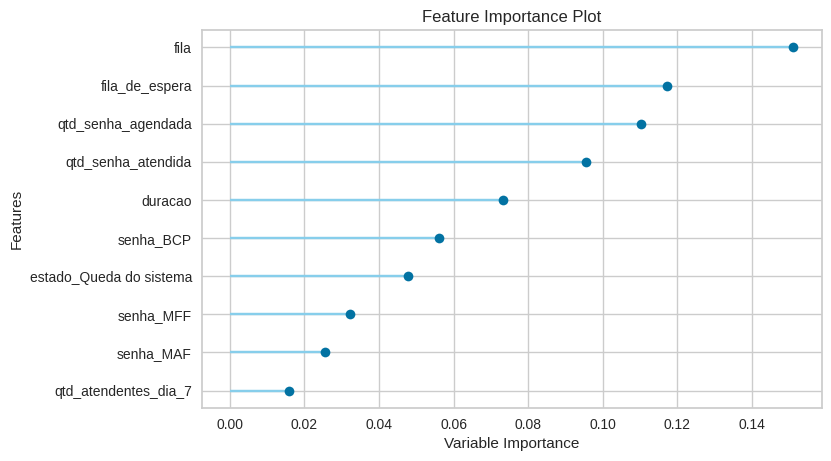

In [ ]:
plot_model(model_tcc, 'feature')

In [ ]:
predict_model(model_tcc, data=test)

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,estado,fila,fila_de_espera,duracao,tempo_de_espera,Label
17742,77.0,98,7,COF,6,Conclusivo,5,3,12,14,13.28
10349,77.0,94,7,COJ,6,Conclusivo,3,2,2,0,17.22
7375,62.0,86,7,BCP,5,Conclusivo,2,0,9,0,0.00
21721,108.0,137,7,BCP,7,Conclusivo,5,3,7,0,0.00
8197,73.0,104,4,PCJ,7,Conclusivo,8,6,9,23,3.03
...,...,...,...,...,...,...,...,...,...,...,...
5835,94.0,117,6,RGJ,7,Conclusivo,5,3,9,1,11.59
21957,100.0,137,4,COF,7,Conclusivo,5,1,16,6,2.21
8721,84.0,109,2,RDF,6,Conclusivo,3,2,6,10,5.24
18599,73.0,118,7,MCJ,6,Interrompido com retorno,3,1,9,2,5.29


In [ ]:
res = predict_model(model_tcc, data=test)

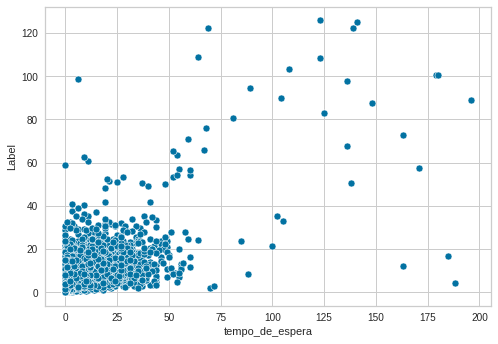

In [ ]:
sns.scatterplot(res['tempo_de_espera'],res['Label'])

In [ ]:
final_model = finalize_model(model_tcc)

In [ ]:
predict_model(final_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.6088,9.7919,3.1292,0.9136,0.4619,0.5142


In [ ]:
aux = predict_model(final_model, data=data_unseen)

In [ ]:
aux

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,estado,fila,fila_de_espera,duracao,tempo_de_espera,Label
0,58.0,87,7,BCP,4,Conclusivo,1,0,5,0,0.00
1,58.0,87,4,MFF,4,Não compareceu,3,3,0,3,14.57
2,58.0,87,8,PTJ,4,Não compareceu,3,1,0,5,4.26
3,58.0,87,4,PEO,4,Conclusivo,5,3,11,8,6.22
4,58.0,87,0,CNJ,4,Conclusivo,2,1,2,0,1.14
...,...,...,...,...,...,...,...,...,...,...,...
3129,74.0,82,2,CPF,5,Conclusivo,5,4,9,13,5.44
3130,74.0,82,2,CCJ,5,Conclusivo,6,2,3,3,10.66
3131,74.0,82,4,MCF,5,Conclusivo,2,1,8,0,6.14
3132,74.0,82,4,BCP,5,Conclusivo,2,1,3,0,0.00


<Figure size 576x396 with 0 Axes>

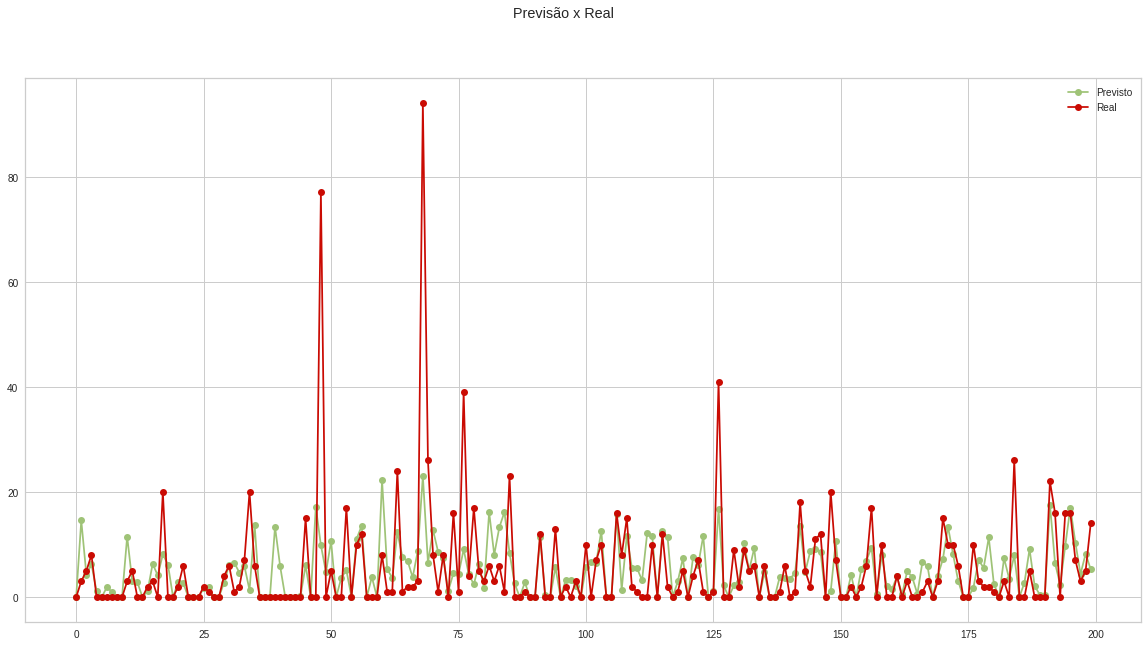

In [ ]:
aux.reset_index(drop=True, inplace=True)
aux1 = aux.head(200)
plt.clf()
fig = plt.figure(figsize=(20,10))
fig.suptitle('Previsão x Real ')
predicted, = plt.plot(aux1.index, aux1['Label'], 'go-', label='Previsto')
actual, = plt.plot(aux1.index, aux1['tempo_de_espera'], 'ro-', label='Real')
plt.legend(handles=[predicted, actual])
plt.show()

In [ ]:
#aux = predict_model(final_model, data=aval)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
print("MAE test score:", mean_absolute_error( aux['tempo_de_espera'], aux['Label']))
print("RMSE test score:", sqrt(mean_squared_error( aux['tempo_de_espera'], aux['Label'])))

MAE test score: 4.37016935353167
RMSE test score: 8.318215232521652


# CRIANDO O MODELO - Dados Tratados

**Utilizando o Pycaret para comparar qual o melhor algoritmo e criar o modelo**

In [ ]:
dados_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28683 entries, 0 to 31339
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data Agendada       20964 non-null  datetime64[ns]
 1   hora_agendada       28683 non-null  object        
 2   qtd_senha_agendada  28683 non-null  float64       
 3   dia_atendimento     28683 non-null  datetime64[ns]
 4   qtd_senha_atendida  28683 non-null  int64         
 5   atendente           28683 non-null  int64         
 6   senha               28683 non-null  float64       
 7   Início              28683 non-null  object        
 8   Fim                 28683 non-null  object        
 9   qtd_atendentes_dia  28683 non-null  int64         
 10  estado              28683 non-null  object        
 11  fila                28683 non-null  int64         
 12  fila_de_espera      28683 non-null  int64         
 13  Serviço             28683 non-null  object    

In [ ]:
df = dados_sem_outliers.drop(columns={'Data Agendada','dia_atendimento','hora_agendada','Início','Fim','Serviço'})


In [ ]:
df

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,estado,fila,fila_de_espera,duracao,tempo_de_espera
0,58.0,87,4,5.64,4,Conclusivo,0,0,6,1.000000
1,58.0,87,7,5.70,4,Conclusivo,1,1,5,3.793103
2,58.0,87,7,7.10,4,Conclusivo,2,0,1,5.000000
4,58.0,87,4,7.20,4,Não compareceu,1,1,0,1.000000
5,58.0,87,4,11.35,4,Não compareceu,2,2,0,3.000000
...,...,...,...,...,...,...,...,...,...,...
31335,74.0,82,4,6.56,5,Conclusivo,4,2,11,3.000000
31336,74.0,82,6,5.53,5,Não compareceu,5,3,0,2.000000
31337,74.0,82,2,6.56,5,Conclusivo,2,1,5,1.000000
31338,74.0,82,6,6.56,5,Conclusivo,3,2,7,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28683 entries, 0 to 31339
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qtd_senha_agendada  28683 non-null  float64
 1   qtd_senha_atendida  28683 non-null  int64  
 2   atendente           28683 non-null  int64  
 3   senha               28683 non-null  float64
 4   qtd_atendentes_dia  28683 non-null  int64  
 5   estado              28683 non-null  object 
 6   fila                28683 non-null  int64  
 7   fila_de_espera      28683 non-null  int64  
 8   duracao             28683 non-null  int64  
 9   tempo_de_espera     28683 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 3.7+ MB


In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Dados para o Modelo: ' + str(data.shape))
print('Dados não vistos para predição: ' + str(data_unseen.shape))

Dados para o Modelo: (25815, 10)
Dados não vistos para predição: (2868, 10)


In [ ]:
train, test = train_test_split( data, test_size=0.3, 
                                     random_state=42)

In [ ]:
train.describe()

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,fila,fila_de_espera,duracao,tempo_de_espera
count,18070.000000,18070.000000,18070.000000,18070.000000,18070.000000,18070.000000,18070.000000,18070.00000,18070.000000
mean,78.051134,106.344715,4.298561,6.798654,5.823298,3.556779,1.891810,7.77078,6.789945
std,14.259563,18.067055,2.059928,1.712919,1.060899,2.230768,1.684861,9.54308,6.722994
min,22.000000,21.000000,1.000000,2.850000,2.000000,0.000000,0.000000,0.00000,0.000000
25%,70.000000,96.000000,2.000000,5.700000,5.000000,2.000000,1.000000,1.00000,2.000000
50%,77.000000,105.000000,4.000000,6.470000,6.000000,3.000000,2.000000,6.00000,5.000000
75%,85.000000,117.000000,6.000000,7.110000,7.000000,5.000000,3.000000,11.00000,9.000000
max,116.000000,155.000000,9.000000,18.310000,9.000000,15.000000,12.000000,200.00000,38.000000


In [ ]:
from sklearn import preprocessing 
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
num_cols = ['qtd_senha_agendada','qtd_senha_atendida','duracao', 'senha']

# aplico standardization em variaveis numericas
for i in num_cols:
  train[i] = min_max_scaler.fit_transform(train[[i]]) 
  test[i] = min_max_scaler.fit_transform(test[[i]])
  data_unseen[i] = min_max_scaler.fit_transform(data_unseen[[i]])

Após dividir a base de treino e teste, vamos normalizar todos os campos

In [ ]:
reg = setup(data = train,           # Banco de dados
              target = 'tempo_de_espera',   # o que estamos tentando prever
              train_size = 0.7           
            
      )     # Proporção do banco de treino

,Description,Value
0,session_id,8621
1,Target,tempo_de_espera
2,Original Data,"(18070, 10)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12648, 52)"


In [ ]:
compare_models( round = 4,  sort = 'mae')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,4.027500e+00,3.509220e+01,5.918800e+00,2.182000e-01,0.8031,1.000100e+00,0.143
rf,Random Forest Regressor,4.125000e+00,3.731480e+01,6.105000e+00,1.680000e-01,0.8249,1.056700e+00,4.270
huber,Huber Regressor,4.162400e+00,3.976710e+01,6.299900e+00,1.149000e-01,0.7940,8.847000e-01,0.387
gbr,Gradient Boosting Regressor,4.211900e+00,3.670530e+01,6.054400e+00,1.818000e-01,0.8286,1.077100e+00,0.935
br,Bayesian Ridge,4.338100e+00,3.763410e+01,6.130900e+00,1.609000e-01,0.8373,1.100400e+00,0.039
ridge,Ridge Regression,4.338600e+00,3.765260e+01,6.132600e+00,1.604000e-01,0.8377,1.100300e+00,0.023
et,Extra Trees Regressor,4.444600e+00,4.330070e+01,6.576400e+00,3.470000e-02,0.8575,1.107800e+00,3.849
omp,Orthogonal Matching Pursuit,4.457300e+00,3.969520e+01,6.296400e+00,1.151000e-01,0.8663,1.159100e+00,0.024
knn,K Neighbors Regressor,4.597700e+00,4.400370e+01,6.627900e+00,1.980000e-02,0.8675,1.112600e+00,0.621
en,Elastic Net,4.809700e+00,4.499030e+01,6.701400e+00,-1.400000e-03,0.9077,1.278400e+00,0.025


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=8621, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
model_tcc = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.8520,30.9296,5.5614,0.1760,0.8096,0.9778
1,4.1315,38.6115,6.2138,0.2436,0.7810,0.9152
2,4.0173,34.0387,5.8343,0.2388,0.8190,0.9776
3,4.0947,34.6661,5.8878,0.2024,0.8074,1.0110
4,3.9886,33.3220,5.7725,0.2277,0.7946,1.1280
5,4.1172,36.0509,6.0042,0.1746,0.8302,1.0433
6,3.7980,30.1933,5.4948,0.2710,0.8074,1.0437
7,4.1149,38.5273,6.2070,0.2059,0.7903,0.9473
8,4.0843,36.1769,6.0147,0.2262,0.7825,0.9569
9,4.0763,38.4061,6.1973,0.2160,0.8094,1.0004


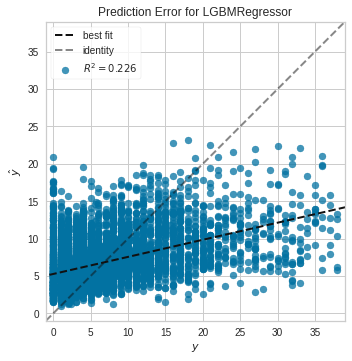

In [ ]:
plot_model(model_tcc,plot='error')

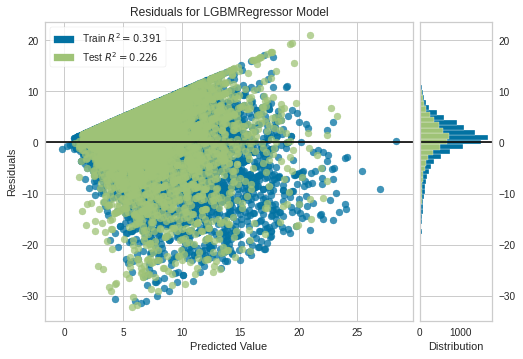

In [ ]:
plot_model(model_tcc, plot='residuals')

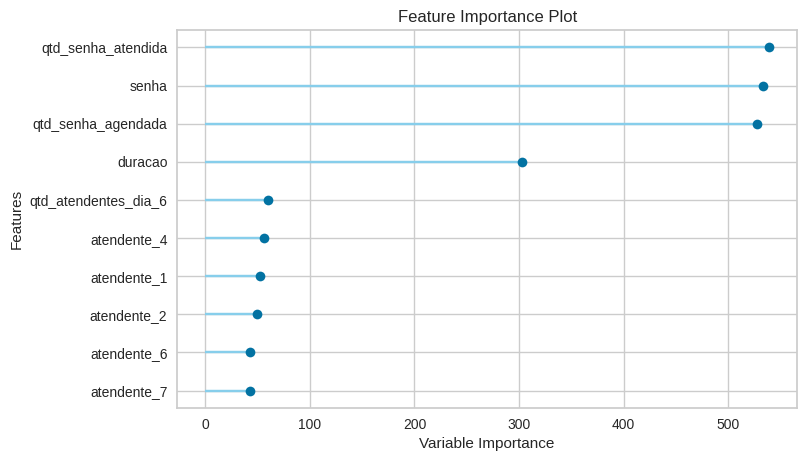

In [ ]:
plot_model(model_tcc, 'feature')

In [ ]:
predict_model(model_tcc, data=test)

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,estado,fila,fila_de_espera,duracao,tempo_de_espera,Label
6133,0.563830,0.649254,4,0.147477,5,other,4,2,0.140496,18.0,6.713909
11608,0.851064,0.835821,2,0.228978,6,Conclusivo,5,4,0.033058,4.0,7.351945
23303,0.925532,0.850746,5,0.239974,7,Conclusivo,6,1,0.057851,5.0,4.190051
20683,0.595745,0.552239,7,0.239974,5,Conclusivo,5,4,0.090909,0.0,14.443619
17382,0.638298,0.746269,4,0.137775,6,Conclusivo,5,3,0.041322,3.0,4.012436
...,...,...,...,...,...,...,...,...,...,...,...
1029,0.531915,0.582090,7,0.549806,5,Não compareceu,3,1,0.000000,7.0,8.970375
25230,0.585106,0.626866,5,0.239974,7,Não compareceu,1,1,0.000000,2.0,2.752820
19236,0.521277,0.559701,3,0.239974,5,Conclusivo,2,0,0.132231,22.0,6.329497
12401,0.627660,0.723881,6,0.250323,7,Conclusivo,3,1,0.214876,9.0,4.979687


In [ ]:
res = predict_model(model_tcc, data=test)

In [ ]:
res[res['tempo_de_espera']==0]

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,estado,fila,fila_de_espera,duracao,tempo_de_espera,Label
20683,0.595745,0.552239,7,0.239974,5,Conclusivo,5,4,0.090909,0.0,14.443619
23252,0.563830,0.544776,7,0.239974,5,other,6,3,0.157025,0.0,11.689883
19509,0.861702,0.865672,4,0.207633,9,Conclusivo,4,1,0.016529,0.0,4.434651
21132,0.585106,0.574627,4,0.137775,7,Não compareceu,6,5,0.000000,0.0,4.223215
20426,0.521277,0.597015,4,0.173351,5,Conclusivo,2,0,0.082645,0.0,4.050297
...,...,...,...,...,...,...,...,...,...,...,...
5253,0.925532,0.850746,4,0.172057,7,Conclusivo,6,2,0.247934,0.0,4.999499
15981,0.436170,0.470149,4,0.364166,4,Conclusivo,1,0,0.049587,0.0,4.558738
21809,0.936170,0.955224,2,0.172057,7,Conclusivo,7,2,0.074380,0.0,6.964848
5129,0.585106,0.626866,4,0.239974,7,Conclusivo,2,0,0.049587,0.0,2.861194


In [ ]:
final_model = finalize_model(model_tcc)

In [ ]:
predict_model(final_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.7169,29.6124,5.4417,0.3521,0.7627,0.933


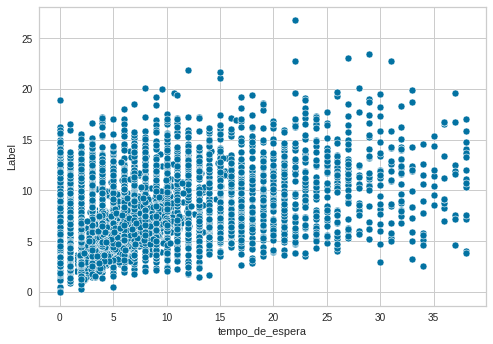

In [ ]:
sns.scatterplot(res['tempo_de_espera'],res['Label'])

In [ ]:
#unseen_predictions
aux = predict_model(final_model, data=data_unseen)

In [ ]:

aux1 = aux.copy()

<Figure size 576x396 with 0 Axes>

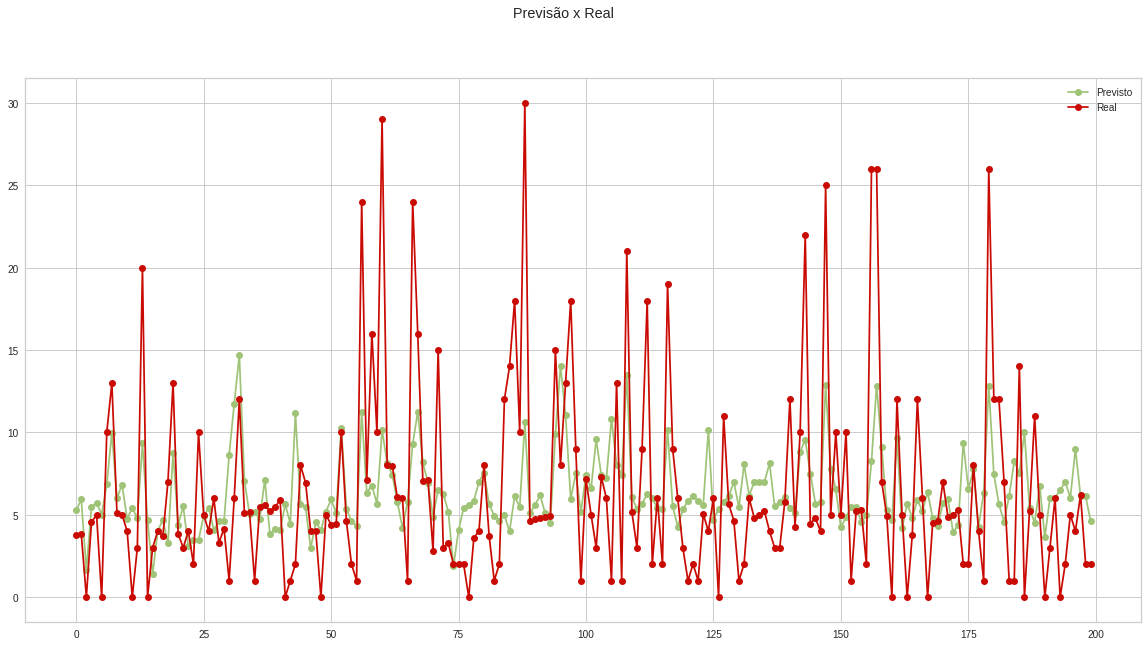

In [ ]:
aux.reset_index(drop=True, inplace=True)
aux = aux.head(200)
plt.clf()
fig = plt.figure(figsize=(20,10))
fig.suptitle('Previsão x Real ')
predicted, = plt.plot(aux.index, aux['Label'], 'go-', label='Previsto')
actual, = plt.plot(aux.index, aux['tempo_de_espera'], 'ro-', label='Real')
plt.legend(handles=[predicted, actual])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
print("MAE test score:", mean_absolute_error( aux1['tempo_de_espera'], aux1['Label']))
print("RMSE test score:", sqrt(mean_squared_error( aux1['tempo_de_espera'], aux1['Label'])))

MAE test score: 4.094511592125669
RMSE test score: 6.014221828636434


# CRIANDO O MODELO - Dados Tratados e campos extras

**Utilizando o Pycaret para comparar qual o melhor algoritmo e criar o modelo**

In [ ]:
novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28107 entries, 0 to 28106
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qtd_senha_agendada  28107 non-null  float64
 1   qtd_senha_atendida  28107 non-null  int64  
 2   atendente           28107 non-null  int64  
 3   senha               28107 non-null  float64
 4   qtd_atendentes_dia  28107 non-null  int64  
 5   tempo_em_execucao   28107 non-null  float64
 6   estado              28107 non-null  object 
 7   fila                28107 non-null  int64  
 8   fila_de_espera      28107 non-null  int64  
 9   duracao             28107 non-null  int64  
 10  tempo_de_espera     28107 non-null  float64
 11  atendente_t1        28107 non-null  int64  
 12  senha_t1            28107 non-null  float64
 13  fila_t1             28107 non-null  int64  
 14  fila_de_espera_t1   28107 non-null  int64  
 15  duracao_t1          28107 non-null  int64  
 16  temp

In [ ]:
df = novo

In [ ]:
df

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,tempo_em_execucao,estado,fila,fila_de_espera,duracao,tempo_de_espera,atendente_t1,senha_t1,fila_t1,fila_de_espera_t1,duracao_t1,tempo_de_espera_t1
0,58.0,87,4,6.860654,4,0.0,Conclusivo,0,0,6,1.000000,7,5.708037,1,1,5,3.793103
1,58.0,87,7,6.088661,4,2.0,Conclusivo,1,1,5,3.793103,7,7.096386,2,0,1,5.000000
2,58.0,87,7,7.101624,4,0.0,Conclusivo,2,0,1,5.000000,4,7.082383,1,1,0,1.000000
3,58.0,87,4,6.764158,4,0.0,Não compareceu,1,1,0,1.000000,4,11.359882,2,2,0,3.000000
4,58.0,87,7,7.101624,4,0.0,Conclusivo,2,0,1,5.000000,7,5.708037,3,3,12,3.836702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28102,74.0,82,4,6.088661,5,2.0,Conclusivo,3,3,3,7.137752,4,6.611822,4,2,11,3.000000
28103,74.0,82,6,6.480199,5,0.0,Não compareceu,3,1,0,5.000000,6,5.573218,5,3,0,2.000000
28104,74.0,82,2,6.480199,5,0.0,Conclusivo,1,1,13,2.000000,2,6.611822,2,1,5,1.000000
28105,74.0,82,7,7.434728,5,0.0,Conclusivo,2,2,4,21.000000,6,6.611822,3,2,7,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28107 entries, 0 to 28106
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qtd_senha_agendada  28107 non-null  float64
 1   qtd_senha_atendida  28107 non-null  int64  
 2   atendente           28107 non-null  int64  
 3   senha               28107 non-null  float64
 4   qtd_atendentes_dia  28107 non-null  int64  
 5   tempo_em_execucao   28107 non-null  float64
 6   estado              28107 non-null  object 
 7   fila                28107 non-null  int64  
 8   fila_de_espera      28107 non-null  int64  
 9   duracao             28107 non-null  int64  
 10  tempo_de_espera     28107 non-null  float64
 11  atendente_t1        28107 non-null  int64  
 12  senha_t1            28107 non-null  float64
 13  fila_t1             28107 non-null  int64  
 14  fila_de_espera_t1   28107 non-null  int64  
 15  duracao_t1          28107 non-null  int64  
 16  temp

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Dados para o Modelo: ' + str(data.shape))
print('Dados não vistos para predição: ' + str(data_unseen.shape))

Dados para o Modelo: (25296, 17)
Dados não vistos para predição: (2811, 17)


In [ ]:
train, test = train_test_split( data, test_size=0.3, 
                                     random_state=42)

In [ ]:
train.describe()

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,tempo_em_execucao,fila,fila_de_espera,duracao,tempo_de_espera,atendente_t1,senha_t1,fila_t1,fila_de_espera_t1,duracao_t1,tempo_de_espera_t1
count,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000,17707.000000
mean,78.176484,106.520359,4.319478,6.829668,5.831197,4.329111,3.285763,1.727001,10.623256,7.480591,4.287175,6.833293,3.612413,1.916361,7.721184,6.829281
std,14.239820,18.048924,2.042247,0.784881,1.060159,8.512003,2.278999,1.668715,12.636884,7.492460,2.051587,1.719170,2.178950,1.661742,9.533874,6.816818
min,22.000000,21.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.846154,0.000000,0.000000,0.000000,0.000000
25%,70.000000,96.000000,2.000000,6.088661,5.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,5.708037,2.000000,1.000000,1.000000,2.000000
50%,77.000000,105.000000,4.000000,6.764158,6.000000,0.000000,3.000000,1.000000,7.000000,5.000000,4.000000,6.611822,3.000000,2.000000,5.000000,5.000000
75%,86.000000,117.000000,6.000000,7.434728,7.000000,6.000000,5.000000,3.000000,14.000000,10.000000,6.000000,7.146226,5.000000,3.000000,11.000000,9.000000
max,116.000000,155.000000,9.000000,13.000000,9.000000,106.000000,15.000000,13.000000,194.000000,38.000000,9.000000,15.000000,15.000000,13.000000,194.000000,38.000000


In [ ]:
from sklearn import preprocessing 
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
num_cols = ['qtd_senha_agendada','qtd_senha_atendida','duracao', 'senha']

# aplico standardization em variaveis numericas
for i in num_cols:
  train[i] = min_max_scaler.fit_transform(train[[i]]) 
  test[i] = min_max_scaler.fit_transform(test[[i]])
  data_unseen[i] = min_max_scaler.fit_transform(data_unseen[[i]])

In [ ]:
reg = setup(data = train,           # Banco de dados
              target = 'tempo_de_espera_t1',   # o que estamos tentando prever
              train_size = 0.7 ,
          ignore_features=['duracao_t1']        
      )     # Proporção do banco de treino

,Description,Value
0,session_id,3450
1,Target,tempo_de_espera_t1
2,Original Data,"(17707, 17)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12394, 94)"


In [ ]:
compare_models( round = 4,  sort = 'mae')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.6132,29.0916,5.3923,0.3712,0.7473,0.8911,0.184
rf,Random Forest Regressor,3.7917,31.8813,5.6444,0.3109,0.7872,0.9903,7.580
et,Extra Trees Regressor,3.8959,32.9482,5.7388,0.2881,0.7847,0.9813,7.367
gbr,Gradient Boosting Regressor,3.8963,32.1332,5.6679,0.3057,0.7878,0.9910,1.642
huber,Huber Regressor,4.0289,36.2676,6.0209,0.2168,0.7774,0.8835,0.642
br,Bayesian Ridge,4.1510,34.6929,5.8889,0.2507,0.8156,1.0561,0.073
ridge,Ridge Regression,4.1602,34.7280,5.8920,0.2499,0.8171,1.0598,0.027
lr,Linear Regression,4.1651,34.7806,5.8965,0.2488,0.8175,1.0608,0.038
omp,Orthogonal Matching Pursuit,4.2778,36.6749,6.0547,0.2080,0.8389,1.1080,0.018
knn,K Neighbors Regressor,4.2924,39.4606,6.2802,0.1474,0.8364,1.0629,0.431


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=3450, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
model_tcc = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.6355,29.9130,5.4693,0.3667,0.7357,0.8769
1,3.7006,28.8701,5.3731,0.4070,0.7351,0.8792
2,3.6952,31.0081,5.5685,0.3369,0.7614,0.9824
3,3.5321,27.9130,5.2833,0.3863,0.7482,0.8518
4,3.5688,28.4336,5.3323,0.3874,0.7639,0.8510
5,3.5940,30.2489,5.4999,0.3071,0.7391,0.8887
6,3.5374,27.8289,5.2753,0.3753,0.7198,0.9139
7,3.5500,26.5932,5.1569,0.4301,0.7493,0.9138
8,3.7197,29.9135,5.4693,0.3593,0.7818,0.9147
9,3.5985,30.1940,5.4949,0.3559,0.7382,0.8388


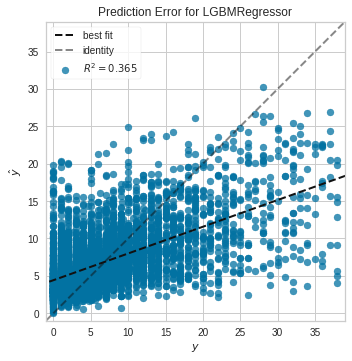

In [ ]:
plot_model(model_tcc,plot='error')

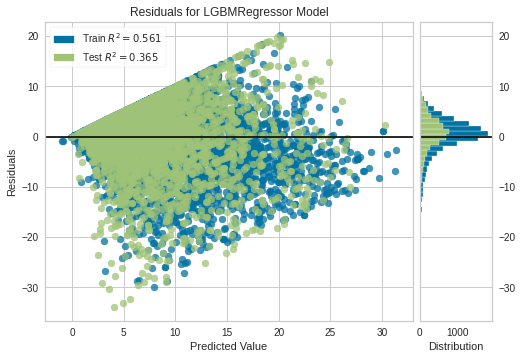

In [ ]:
plot_model(model_tcc, plot='residuals')

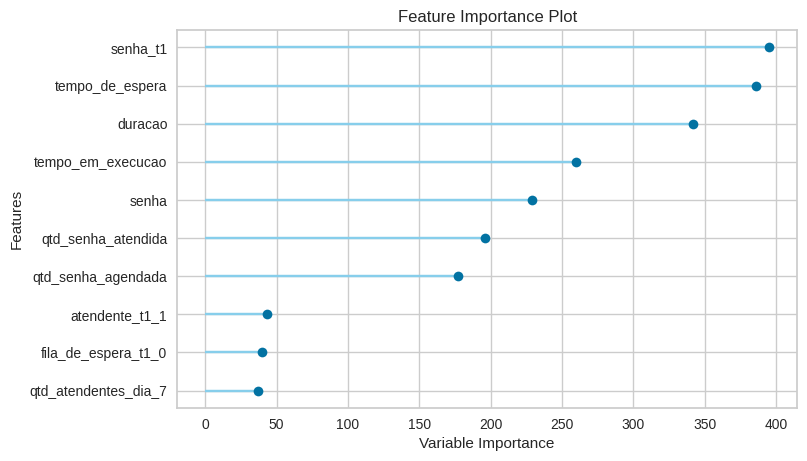

In [ ]:
plot_model(model_tcc, 'feature')

In [ ]:
predict_model(model_tcc, data=test)

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,tempo_em_execucao,estado,fila,fila_de_espera,duracao,tempo_de_espera,atendente_t1,senha_t1,fila_t1,fila_de_espera_t1,duracao_t1,tempo_de_espera_t1,Label
2604,0.680851,0.716418,4,0.416186,5,0.000000,Não compareceu,0,0,0.000,1.000000,4,6.611822,1,0,5,1.000000,2.835741
21087,0.404255,0.417910,2,0.435290,5,2.966667,Conclusivo,0,0,0.020,3.920391,3,5.708037,2,1,16,4.022881,4.159382
5464,0.521277,0.544776,2,0.625162,5,7.000000,Conclusivo,1,0,0.070,3.000000,2,11.359882,1,0,2,18.000000,8.196408
8109,0.648936,0.701493,6,0.416186,6,0.000000,Conclusivo,0,0,0.065,4.000000,6,5.708037,2,2,0,4.897606,5.425057
8447,0.095745,0.268657,6,0.360871,6,0.000000,Conclusivo,8,6,0.045,4.694636,6,6.108280,4,2,22,8.000000,4.558867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16375,0.638298,0.649254,6,0.416186,6,0.000000,Conclusivo,2,0,0.035,8.000000,6,5.708037,3,3,7,9.099529,6.701783
20894,0.542553,0.559701,4,0.509241,6,3.000000,Conclusivo,3,1,0.045,7.000000,4,6.770878,4,0,7,10.000000,6.994429
10611,0.638298,0.746269,7,0.655618,6,0.000000,Conclusivo,1,1,0.005,12.000000,7,7.146226,5,3,52,6.000000,8.584284
485,0.553191,0.567164,6,0.504945,6,0.000000,Conclusivo,8,6,0.010,9.000000,6,6.611822,9,7,10,13.000000,10.290388


In [ ]:
res = predict_model(model_tcc, data=test)

In [ ]:
print("MAE test score:", mean_absolute_error( res['tempo_de_espera_t1'], res['Label']))
print("RMSE test score:", sqrt(mean_squared_error( res['tempo_de_espera_t1'], res['Label'])))

MAE test score: 3.6488335338313926
RMSE test score: 5.421479582431


In [ ]:
res[res['tempo_de_espera_t1']==0]

,qtd_senha_agendada,qtd_senha_atendida,atendente,senha,qtd_atendentes_dia,tempo_em_execucao,estado,fila,fila_de_espera,duracao,tempo_de_espera,atendente_t1,senha_t1,fila_t1,fila_de_espera_t1,duracao_t1,tempo_de_espera_t1,Label
6706,0.670213,0.671642,2,0.321148,7,0.0,other,7,5,0.010,9.000000,2,6.017150,8,6,13,0.0,5.821065
24708,0.468085,0.604478,4,0.435290,5,11.0,Conclusivo,1,0,0.125,9.000000,7,6.611822,2,1,6,0.0,10.826562
22449,0.489362,0.552239,4,0.623863,6,0.0,Não compareceu,2,0,0.000,3.000000,4,7.146226,1,0,23,0.0,2.338702
21865,0.680851,0.641791,4,0.416186,6,0.0,Conclusivo,5,2,0.030,5.000000,4,4.523585,6,3,4,0.0,4.073556
18056,0.638298,0.597015,3,0.551038,8,24.0,Conclusivo,3,1,0.245,16.000000,2,9.118321,8,3,13,0.0,14.438060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23583,0.521277,0.708955,7,0.416186,5,0.0,other,2,0,0.005,3.000000,7,6.611822,3,1,0,0.0,2.906131
5412,0.787234,0.880597,5,0.416186,7,0.0,Conclusivo,2,0,0.015,2.000000,5,6.232666,2,0,7,0.0,1.690973
19418,0.436170,0.552239,7,0.843076,6,18.0,Conclusivo,4,2,0.185,0.000000,4,7.686822,4,2,1,0.0,6.085310
22191,0.627660,0.552239,4,0.354636,5,0.0,Conclusivo,0,0,0.070,4.470926,4,6.611822,2,1,3,0.0,5.481230


In [ ]:
final_model = finalize_model(model_tcc)

In [ ]:
predict_model(final_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.1942,22.4839,4.7417,0.5198,0.7026,0.81


In [ ]:
#unseen_predictions
aux = predict_model(final_model, data=data_unseen)

In [ ]:
#aux = predict_model(final_model, data=test)
aux1 = aux.copy()

<Figure size 576x396 with 0 Axes>

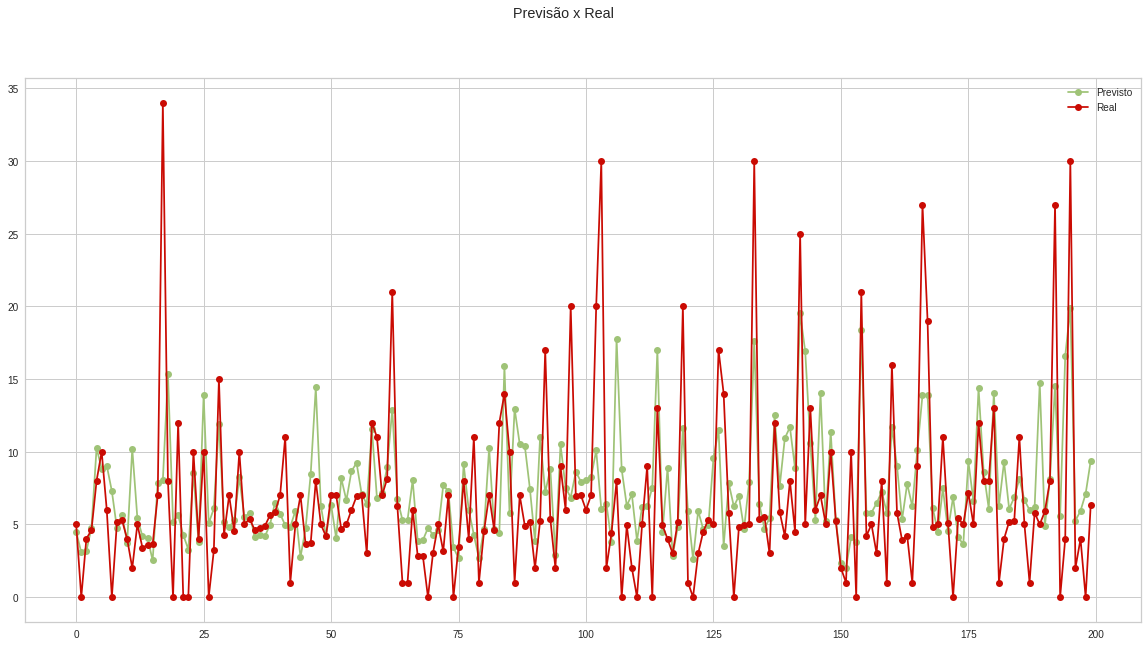

In [ ]:
aux.reset_index(drop=True, inplace=True)
aux = aux.head(200)
plt.clf()
fig = plt.figure(figsize=(20,10))
fig.suptitle('Previsão x Real ')
predicted, = plt.plot(aux.index, aux['Label'], 'go-', label='Previsto')
actual, = plt.plot(aux.index, aux['tempo_de_espera_t1'], 'ro-', label='Real')
plt.legend(handles=[predicted, actual])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
print("MAE test score:", mean_absolute_error( aux1['tempo_de_espera_t1'], aux1['Label']))
print("RMSE test score:", sqrt(mean_squared_error( aux1['tempo_de_espera_t1'], aux1['Label'])))

MAE test score: 3.8535258690956637
RMSE test score: 5.618573300880526


# GLM

In [ ]:
df = novo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28107 entries, 0 to 28106
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qtd_senha_agendada  28107 non-null  float64
 1   qtd_senha_atendida  28107 non-null  int64  
 2   atendente           28107 non-null  int64  
 3   senha               28107 non-null  float64
 4   qtd_atendentes_dia  28107 non-null  int64  
 5   tempo_em_execucao   28107 non-null  float64
 6   estado              28107 non-null  object 
 7   fila                28107 non-null  int64  
 8   fila_de_espera      28107 non-null  int64  
 9   duracao             28107 non-null  int64  
 10  tempo_de_espera     28107 non-null  float64
 11  atendente_t1        28107 non-null  int64  
 12  senha_t1            28107 non-null  float64
 13  fila_t1             28107 non-null  int64  
 14  fila_de_espera_t1   28107 non-null  int64  
 15  duracao_t1          28107 non-null  int64  
 16  temp

In [ ]:
dummy = pd.get_dummies(df['estado']) 
df = pd.concat([df,dummy],axis=1)

In [ ]:
df.drop(columns='estado',axis=1,inplace=True)

In [ ]:
df = df.rename (columns={'Não compareceu':'n_compareceu'})

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Dados para o Modelo: ' + str(data.shape))
print('Dados não vistos para predição: ' + str(data_unseen.shape))

Dados para o Modelo: (25296, 19)
Dados não vistos para predição: (2811, 19)


In [ ]:
data.columns

Index(['qtd_senha_agendada', 'qtd_senha_atendida', 'atendente', 'senha',
       'qtd_atendentes_dia', 'tempo_em_execucao', 'fila', 'fila_de_espera',
       'duracao', 'tempo_de_espera', 'atendente_t1', 'senha_t1', 'fila_t1',
       'fila_de_espera_t1', 'duracao_t1', 'tempo_de_espera_t1', 'Conclusivo',
       'n_compareceu', 'other'],
      dtype='object')

Training data set length=17668
Testing data set length=7628
                 Generalized Linear Model Regression Results                  
Dep. Variable:     tempo_de_espera_t1   No. Observations:                17668
Model:                            GLM   Df Residuals:                    17651
Model Family:                 Poisson   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68121.
Date:                Mon, 12 Jul 2021   Deviance:                       79027.
Time:                        20:16:38   Pearson chi2:                 8.43e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

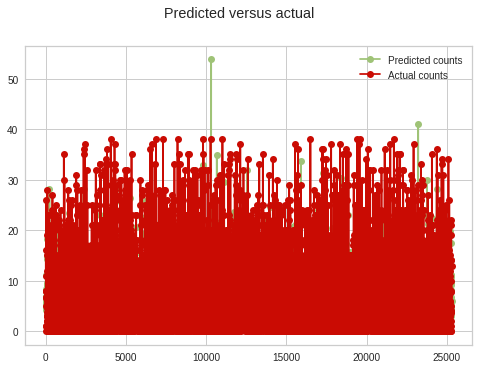

<Figure size 576x396 with 0 Axes>

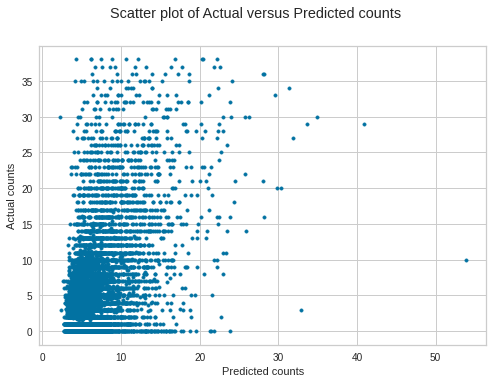

In [ ]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt



#divide em conjuntos de treino e teste
mask = np.random.rand(len(data)) < 0.7
df_train = data[mask]
df_test = data[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

#Setup da expressão de regression em patsy notation. Aqui diz que a variavel tempo_de_espera_t1 é nossa variavel dependente
expr = 'tempo_de_espera_t1 ~ qtd_senha_agendada+ qtd_senha_atendida+ atendente+ senha+ qtd_atendentes_dia+ tempo_em_execucao+ fila+ fila_de_espera+ duracao+ tempo_de_espera+ atendente_t1+ senha_t1+ fila_t1+ fila_de_espera_t1+ Conclusivo+ n_compareceu+ other'

#configura as matrizes
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Usando o statsmodels GLM class, treina o modelo de regressão Poisson no conjunto de treino.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

#Fazendo predições no conjunto de teste.
poisson_predictions = poisson_training_results.get_prediction(X_test)

predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['tempo_de_espera_t1']

#plota o grafico
fig = plt.figure()
fig.suptitle('Predicted versus actual ')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

<Figure size 576x396 with 0 Axes>

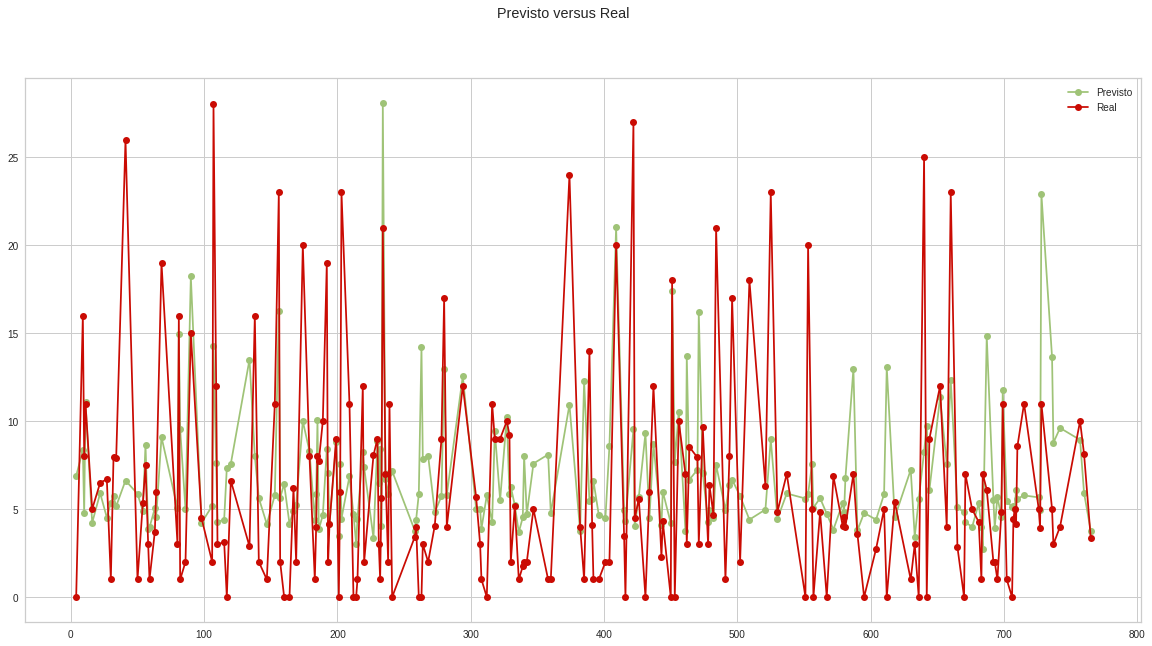

In [ ]:
#plt.figure(figsize=(20,10))
plt.clf()
fig = plt.figure(figsize=(20,10))
fig.suptitle('Previsto versus Real ')
predicted, = plt.plot(X_test.head(200).index, predicted_counts.head(200), 'go-', label='Previsto')
actual, = plt.plot(X_test.head(200).index, actual_counts.head(200), 'ro-', label='Real')
plt.legend(handles=[predicted, actual])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
print("MAE test score:", mean_absolute_error(actual_counts, predicted_counts))
print("RMSE test score:", sqrt(mean_squared_error(actual_counts, predicted_counts)))

MAE test score: 4.235348733343328
RMSE test score: 6.064215782689035


In [ ]:
y_aval, X_aval = dmatrices(expr, data_unseen, return_type='dataframe')

In [ ]:
poisson_predictions_aval = poisson_training_results.get_prediction(X_aval)
predictions_summary_frame = poisson_predictions_aval.summary_frame()
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_aval['tempo_de_espera_t1']
print("MAE test score:", mean_absolute_error(actual_counts, predicted_counts))
print("RMSE test score:", sqrt(mean_squared_error(actual_counts, predicted_counts)))

MAE test score: 4.235257217908597
RMSE test score: 6.110965812587982
